# Plan of Attack
The crop yield depends on many factors (geography, soil type, fertiliser use, adoption of new modern high-yielding variety (MV) rice etc.), weather just being one. These other factors though are likely to be systematic (i.e. Evolve slowly over time) and contribute to the general trend in crop yield. i.e. Any fluctuations above or below trend are likely down to weather. Here we test this hypothesis.

We thus need to:

1. Obtain the fluctuations about the average yield
2. Obtain the fluctuations of the weather 

We will do this by using moving averages. We will therefore replace the absolute average yield and absolute temperature values with fluctuation values (We might use z-scores = (value - rolling mean)/std dev ).

If weather plays a role in rice yields, one would expect to see a clear correlation between yield and weather fluctations. Maybe we find that extreme high or low temperatures/rainfall contribute to a poor harvest. 

How to analyse this potential correlation? 

1. Build a model: yield deviation = T1 + T2 + ... T12 + R1 + R2 + ... + R12 (Or a classificayion model where we replace yield deviation with +1 (Good harvest) and -1 (Bad harvest))

2. Perform clustering: For a particular year, cluster the countries on their weather data and calculate the average yield deviation in each group. Is there a significant difference in the values?



In [186]:
# Set the working directory
setwd("/Users/billyhanan/Documents/NCI  Diploma in Data Analytics/Advanced Data Mining/Project")

# Read in primary data file
df1 = read.csv("./Data/Final_crop_data.csv",header=T)

# Delete unnecessary columns
df1$X <- NULL
df1$SEQ_NO <- NULL

# Rename column
names(df1)[3] <- "COUNTRY"

# Read in file with ISO country codes
df_iso = read.csv("./Data/wikipedia-iso-country-codes.csv",header=T)
names(df_iso)[1] <- 'Name'

# Merge two files
df = merge(df1, df_iso, by.x='ISO', by.y='Alpha.3.code')

# Delete redundant columns
df$Alpha.2.code = NULL
df$Numeric.code = NULL
df$ISO.3166.2 = NULL

# Assign values to COUNTRY column
df$COUNTRY = df$Name
df$Name = NULL

# Simplify some of the country names
levels(df$COUNTRY)[levels(df$COUNTRY)=="Bolivia, Plurinational State of"] = "Bolivia"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Brunei Darussalam"] = "Brunei"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Côte d'Ivoire"] = "Ivory Coast"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Iran, Islamic Republic of"] = "Iran"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Korea, Republic of"] = "South Korea"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Lao People's Democratic Republic"] = "Laos"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Macedonia, the former Yugoslav Republic of"] = "Macedonia"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Russian Federation"] = "Russia"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Tanzania, United Republic of"] = "Tanzania"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Venezuela, Bolivarian Republic of"] = "Venezuela"
levels(df$COUNTRY)[levels(df$COUNTRY)=="Viet Nam"] = "Vietnam"

# Remove redundant levels
df=droplevels(df)

# Read in csv file holding total annual paddy rice production 
df1 = read.csv("./Data/wrs_annual_rice_production.csv",header=T)

# Create temporary capitalised country column in Master dataframe
df$CAP_COUNTRY = toupper(df$COUNTRY)

# Merge with master data frame
df2 = merge(df, df1, by.x=c('CAP_COUNTRY','YEAR'), by.y=c('Country','Year'), all.x=T) 

# Shift PRODUCTION column and remove redundant Year and CAP_COUNTRY columns
df = df2[c('COUNTRY','ISO','YEAR','LAND_AREA','HARV_AREA','FERT','YIELD','PRODUCTION','AVG_TEMP_JAN','AVG_TEMP_FEB','AVG_TEMP_MAR','AVG_TEMP_APR','AVG_TEMP_MAY','AVG_TEMP_JUN','AVG_TEMP_JUL','AVG_TEMP_AUG','AVG_TEMP_SEP','AVG_TEMP_OCT','AVG_TEMP_NOV','AVG_TEMP_DEC','AVG_RF_JAN','AVG_RF_FEB','AVG_RF_MAR','AVG_RF_APR','AVG_RF_MAY','AVG_RF_JUN','AVG_RF_JUL','AVG_RF_AUG','AVG_RF_SEP','AVG_RF_OCT','AVG_RF_NOV','AVG_RF_DEC','AVG_Q1_TEMP','AVG_Q2_TEMP','AVG_Q3_TEMP','AVG_Q4_TEMP','AVG_Q4_RF','AVG_Q3_RF','AVG_Q2_RF','AVG_Q1_RF')]

# Remove unneeded variables
rm(df1)
rm(df2)


In [71]:
head(df)


COUNTRY,ISO,YEAR,LAND_AREA,HARV_AREA,FERT,YIELD,PRODUCTION,AVG_TEMP_JAN,AVG_TEMP_FEB,⋯,AVG_RF_NOV,AVG_RF_DEC,AVG_Q1_TEMP,AVG_Q2_TEMP,AVG_Q3_TEMP,AVG_Q4_TEMP,AVG_Q4_RF,AVG_Q3_RF,AVG_Q2_RF,AVG_Q1_RF
Afghanistan,AFG,1991,65286,173000,6.140000,1.94,335000,-0.03110,1.43654,⋯,12.66710,38.55690,2.764097,17.69763,22.97277,8.143453,18.43989,7.230680,38.21139,81.26800
Afghanistan,AFG,1992,65286,175000,5.790000,1.71,300000,0.74637,2.46018,⋯,9.92092,47.46040,2.973320,16.89697,21.80963,8.498270,24.41974,7.827567,44.34204,59.46273
Afghanistan,AFG,1993,65286,175000,5.110000,1.71,300000,-0.08350,4.33465,⋯,21.58090,20.68180,3.457163,18.33557,22.52880,7.587023,16.62800,5.226967,29.86003,53.98010
Afghanistan,AFG,1994,65286,180000,5.820435,1.90,342000,1.11415,1.14112,⋯,12.81990,36.94000,3.744203,18.18197,22.22033,8.173570,23.60247,11.033253,23.07017,56.36823
Afghanistan,AFG,1995,65286,170000,5.820435,2.29,390000,0.92358,2.96133,⋯,6.24458,35.71700,3.417947,17.96013,23.05943,7.726067,18.51706,7.733073,31.69475,42.35450
Afghanistan,AFG,1996,65286,175000,0.650000,1.94,340000,-0.48840,2.86922,⋯,9.68384,6.71934,3.225333,17.79007,22.77710,7.208570,10.37393,5.784513,27.51930,63.32300


# Initial Data Exploration

Let us check our data for null or suspicious values

In [177]:
# We have annual data from 1991-2015 (inclusive) for 105 countries 
unique(df$COUNTRY)
cat(paste('Number of countries = ',length(unique(df$COUNTRY))))
unique(df$YEAR)

[1] Afghanistan              Algeria                  Angola                  
  [4] Argentina                Australia                Azerbaijan              
  [7] Bangladesh               Belize                   Benin                   
 [10] Bhutan                   Bolivia                  Brazil                  
 [13] Brunei                   Bulgaria                 Burkina Faso            
 [16] Burundi                  Cambodia                 Cameroon                
 [19] Central African Republic Chad                     Chile                   
 [22] China                    Colombia                 Comoros                 
 [25] Congo                    Costa Rica               Cuba                    
 [28] Dominican Republic       Ecuador                  Egypt                   
 [31] El Salvador              Ethiopia                 Fiji                    
 [34] France                   Gabon                    Ghana                   
 [37] Greece                   Guatemala                Guinea                  
 [40] Guinea-Bissau            Guyana                   Haiti                   
 [43] Honduras                 Hungary                  India                   
 [46] Indonesia                Iran                     Iraq                    
 [49] Italy                    Ivory Coast              Jamaica                 
 [52] Japan                    Kazakhstan               Kenya                   
 [55] Kyrgyzstan               Laos                     Macedonia               
 [58] Madagascar               Malawi                   Malaysia                
 [61] Mali                     Mauritania               Mauritius               
 [64] Mexico                   Mozambique               Myanmar                 
 [67] Nepal                    Nicaragua                Niger                   
 [70] Nigeria                  Pakistan                 Panama                  
 [73] Papua New Guinea         Paraguay                 Peru                    
 [76] Philippines              Portugal                 Romania                 
 [79] Russia                   Rwanda                   Senegal                 
 [82] Sierra Leone             Somalia                  South Africa            
 [85] South Korea              Spain                    Sri Lanka               
 [88] Sudan                    Suriname                 Swaziland               
 [91] Tajikistan               Tanzania                 Thailand                
 [94] Togo                     Trinidad and Tobago      Turkey                  
 [97] Turkmenistan             Uganda                   Ukraine                 
[100] United States            Uruguay                  Uzbekistan              
[103] Venezuela                Vietnam                  Zambia                  
105 Levels: Afghanistan Algeria Angola Argentina Australia ... Zambia

Number of countries =  105

[1] 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
[16] 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015

In [121]:
# Some null values exist however
cat(paste('Number of null values = ',sum(colSums(is.na(df)))))

# And they all exist in the PRODUCTION column
sum(is.na(df$PRODUCTION))

Number of null values =  26

[1] 26

In [122]:
# Here are the 26 rows containing NULL values
df[is.na(df$PRODUCTION),c('COUNTRY','YEAR','YIELD','PRODUCTION')]

,COUNTRY,YEAR,YIELD,PRODUCTION
126,Azerbaijan,1991,3.157917,NA
776,Ethiopia,1991,2.145217,NA
777,Ethiopia,1992,2.145217,NA
1301,Kazakhstan,1991,3.350833,NA
1351,Kyrgyzstan,1991,2.642917,NA
1401,Macedonia,1991,5.229167,NA
1553,Mauritius,1993,3.111000,NA
1554,Mauritius,1994,3.111000,NA
1555,Mauritius,1995,3.111000,NA
1556,Mauritius,1996,3.111000,NA


In [123]:
# This function can be used to check for similar repeated values on any numerical column
repeatedValues = function(df1, col_name)
 {
    # Remove any rows with NULL values 
    df1 = df1[!is.na(df1[,col_name]),]
    
    # Extract countries and requested values from dataframe 
    col_vector = df1[,col_name]
    countries = df1[,'COUNTRY']
    
    # Extract countries and convert to strings
    countries = as.character(countries)
    
    country = c()
    
    j=1
    for ( i in 1:(length(col_vector)-1) )
     {
        if ( col_vector[i] == col_vector[i+1] )
         {
          country[j] = countries[i]
          j = j + 1
         }
     }
    
    # Count sequence length
    return(country)
 }

# Data Clean-up and Imputation

Here we investigate the integrity of our data. We check the key target variables YIELD and PRODUCTION for suspicious repeated values. We similarly checked the monthly weather data.

In [7]:
sort(table(repeatedValues(df,'YIELD')),decreasing=T)


                   Congo                Mauritius                  Comoros 
                      19                       15                       12 
                  Guinea Central African Republic                   Uganda 
                       9                        7                        7 
             Afghanistan                  Algeria                  Nigeria 
                       4                        3                        3 
            Sierra Leone                 Thailand                   Angola 
                       3                        3                        2 
                   Gabon                Indonesia               Mozambique 
                       2                        2                        2 
                 Somalia      Trinidad and Tobago                    Benin 
                       2                        2                        1 
                  Brunei                 Cameroon               Costa Rica 
           

In [8]:
sort(table(repeatedValues(df,'PRODUCTION')),decreasing=T)


          Swaziland    Papua New Guinea            Ethiopia             Somalia 
                 12                  11                   3                   3 
        Afghanistan              Angola              Brunei               Kenya 
                  2                   2                   2                   2 
              Sudan             Algeria               Gabon               Haiti 
                  2                   1                   1                   1 
       South Africa Trinidad and Tobago              Turkey        Turkmenistan 
                  1                   1                   1                   1 
             Uganda             Ukraine 
                  1                   1 

In [9]:
sort(table(repeatedValues(df,'AVG_RF_JAN')),decreasing=T)


           Niger Papua New Guinea    Guinea-Bissau             Chad 
              24               14                9                5 
         Senegal     Burkina Faso 
               3                1 

Based on the above investigations and a visual inspection of the data, it was decided to remove the following countries from the data set due to concerns over data integrity:

|Country|
---------
Congo
Mauritius
Comoros
Guinea
Central African Republic
Uganda 
Swaziland
Papua New Guinea
Niger
Guinea-Bissau
Chad


In [10]:
# Remove above countries from data set
#countries_to_remove = c('Congo','Mauritius','Comoros','Guinea','Central African Republic','Uganda','Swaziland','Papua New Guinea','Niger','Guinea-Bissau','Chad')

#for (country in countries_to_remove)
# {
#  df = df[!(df$COUNTRY==country),]   
# }

#df=droplevels(df)


In [8]:
# After the above clean-up, we are left with the following rows with null values
df[is.na(df$PRODUCTION),c('COUNTRY','YEAR','YIELD','PRODUCTION')]

,COUNTRY,YEAR,YIELD,PRODUCTION
126,Azerbaijan,1991,3.157917,NA
776,Ethiopia,1991,2.145217,NA
777,Ethiopia,1992,2.145217,NA
1301,Kazakhstan,1991,3.350833,NA
1351,Kyrgyzstan,1991,2.642917,NA
1401,Macedonia,1991,5.229167,NA
1553,Mauritius,1993,3.111000,NA
1554,Mauritius,1994,3.111000,NA
1555,Mauritius,1995,3.111000,NA
1556,Mauritius,1996,3.111000,NA


Visually inspecting the data, it was decided to impute the missing values by performing linear regression. Specifically, we perform a simple linear regression of production value against year over the years 1992-1996 and then use the fitted line to predict the missing value.

This is done in the following code.  

In [187]:
countries_to_impute = c('Azerbaijan','Ethiopia','Kazakhstan','Kyrgyzstan','Macedonia','Russia','Tajikistan','Turkmenistan','Ukraine','Uzbekistan')

for (country in countries_to_impute)
 {
  # Retrieve the year and production values from 1991-1996 for the country
  year_production = subset(df,COUNTRY==country & YEAR<=1996)[c('YEAR','PRODUCTION')]
    
  # Fit Regression line
  model = lm(PRODUCTION ~ YEAR, data=year_production)

  # Retrieve years with NULL production
  null_data = year_production[is.na(year_production$PRODUCTION),]
    
  # Predict missing production values from fitted regression line
  predicted_values = predict(model, newdata=null_data)
    
  # Insert predicted production values into master dataframe
  for (i in 1:length(null_data$YEAR))
   {
    year = null_data$YEAR[i]
      
    if ( predicted_values[[i]] > 0 )
     {
      df[df$COUNTRY==country & df$YEAR==year,'PRODUCTION'] =  predicted_values[[i]]
     }
    else
     {
      print(paste("WARNING: Obtained negative prediction for",country,"in the year",year)) 
     }
   }

 }



[1] "WARNING: Obtained negative prediction for Azerbaijan in the year 1991"
[1] "WARNING: Obtained negative prediction for Kyrgyzstan in the year 1991"


In [188]:
# Manually insert value for failed predictions - simply inserted value in most recent year in the future
df[df$COUNTRY=='Azerbaijan' & df$YEAR==1991,'PRODUCTION'] = 622
df[df$COUNTRY=='Kyrgyzstan' & df$YEAR==1991,'PRODUCTION'] = 2800


# Summary

We are now left with full (no missing values) data sets for 94 countries from the years 1991-2015

In [190]:
# We have annual data from 1991-2015 (inclusive) for 105 countries 
unique(df$COUNTRY)
cat(paste('Number of countries = ',length(unique(df$COUNTRY))))
unique(df$YEAR)

# Number of null values 
cat(paste('Number of null values = ',sum(is.na(df))))

[1] Afghanistan              Algeria                  Angola                  
  [4] Argentina                Australia                Azerbaijan              
  [7] Bangladesh               Belize                   Benin                   
 [10] Bhutan                   Bolivia                  Brazil                  
 [13] Brunei                   Bulgaria                 Burkina Faso            
 [16] Burundi                  Cambodia                 Cameroon                
 [19] Central African Republic Chad                     Chile                   
 [22] China                    Colombia                 Comoros                 
 [25] Congo                    Costa Rica               Cuba                    
 [28] Dominican Republic       Ecuador                  Egypt                   
 [31] El Salvador              Ethiopia                 Fiji                    
 [34] France                   Gabon                    Ghana                   
 [37] Greece                   Guatemala                Guinea                  
 [40] Guinea-Bissau            Guyana                   Haiti                   
 [43] Honduras                 Hungary                  India                   
 [46] Indonesia                Iran                     Iraq                    
 [49] Italy                    Ivory Coast              Jamaica                 
 [52] Japan                    Kazakhstan               Kenya                   
 [55] Kyrgyzstan               Laos                     Macedonia               
 [58] Madagascar               Malawi                   Malaysia                
 [61] Mali                     Mauritania               Mexico                  
 [64] Mozambique               Myanmar                  Nepal                   
 [67] Nicaragua                Niger                    Nigeria                 
 [70] Pakistan                 Panama                   Papua New Guinea        
 [73] Paraguay                 Peru                     Philippines             
 [76] Portugal                 Romania                  Russia                  
 [79] Rwanda                   Senegal                  Sierra Leone            
 [82] Somalia                  South Africa             South Korea             
 [85] Spain                    Sri Lanka                Sudan                   
 [88] Suriname                 Swaziland                Tajikistan              
 [91] Tanzania                 Thailand                 Togo                    
 [94] Trinidad and Tobago      Turkey                   Turkmenistan            
 [97] Uganda                   Ukraine                  United States           
[100] Uruguay                  Uzbekistan               Venezuela               
[103] Vietnam                  Zambia                  
105 Levels: Afghanistan Algeria Angola Argentina Australia ... Zambia

Number of countries =  104

[1] 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
[16] 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015

Number of null values =  0

In [189]:
df = df[!(df$COUNTRY=="Mauritius"),] 



In [146]:
names(df)

[1] "COUNTRY"      "ISO"          "YEAR"         "LAND_AREA"    "HARV_AREA"   
 [6] "FERT"         "YIELD"        "PRODUCTION"   "AVG_TEMP_JAN" "AVG_TEMP_FEB"
[11] "AVG_TEMP_MAR" "AVG_TEMP_APR" "AVG_TEMP_MAY" "AVG_TEMP_JUN" "AVG_TEMP_JUL"
[16] "AVG_TEMP_AUG" "AVG_TEMP_SEP" "AVG_TEMP_OCT" "AVG_TEMP_NOV" "AVG_TEMP_DEC"
[21] "AVG_RF_JAN"   "AVG_RF_FEB"   "AVG_RF_MAR"   "AVG_RF_APR"   "AVG_RF_MAY"  
[26] "AVG_RF_JUN"   "AVG_RF_JUL"   "AVG_RF_AUG"   "AVG_RF_SEP"   "AVG_RF_OCT"  
[31] "AVG_RF_NOV"   "AVG_RF_DEC"   "AVG_Q1_TEMP"  "AVG_Q2_TEMP"  "AVG_Q3_TEMP" 
[36] "AVG_Q4_TEMP"  "AVG_Q4_RF"    "AVG_Q3_RF"    "AVG_Q2_RF"    "AVG_Q1_RF"

# Check for outliers

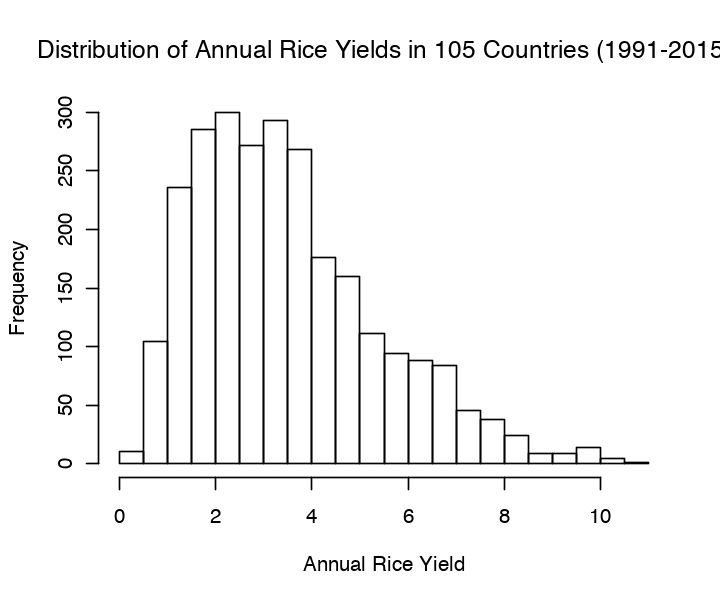

In [15]:
library(repr)

# Change plot size 
options(repr.plot.width=6, repr.plot.height=5)

# Yield
hist(df$YIELD,breaks=30,xlab='Annual Rice Yield',ylab='Frequency',main='Distribution of Annual Rice Yields in 105 Countries (1991-2015)')


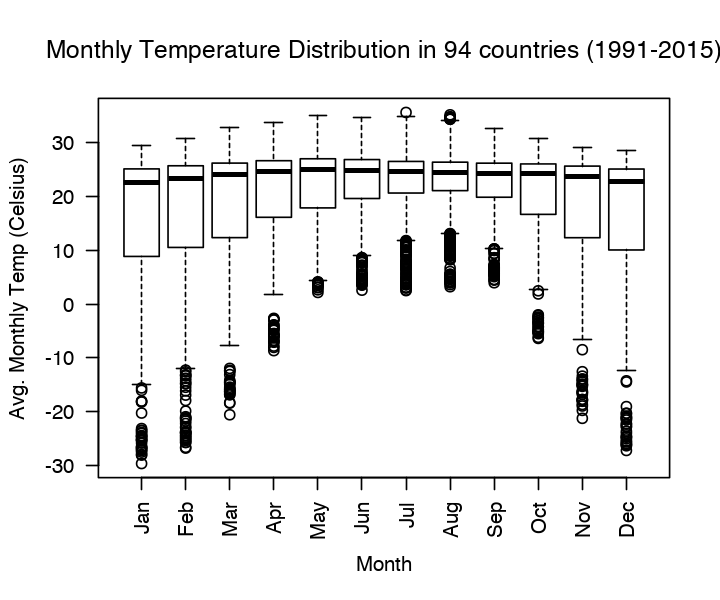

In [16]:
# Distribution of monthly temperature values
monthlyLabels = c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
boxplot(df[,9:20],las=2,xlab='Month',ylab='Avg. Monthly Temp (Celsius)',main='Monthly Temperature Distribution in 94 countries (1991-2015)',names=monthlyLabels)


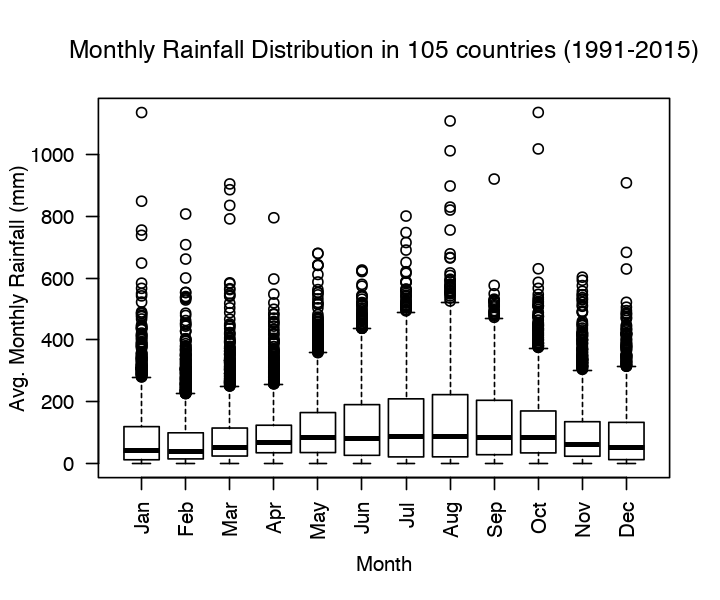

In [17]:
# Distribution of monthly Precipitation 
monthlyLabels = c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
boxplot(df[,21:32],las=2,xlab='Month',ylab='Avg. Monthly Rainfall (mm)',main='Monthly Rainfall Distribution in 105 countries (1991-2015)',names=monthlyLabels)


# Rolling Averages

Below I define the function get_sma_for_column() that can be used to calculate a rolling average (per country) for any column in dataframe

In [191]:
# Calculate moving average in rice yield time series
sma <- function(x, n = 5){filter(x, rep(1/n, n), sides = 2)}

get_sma_for_column <- function(df,newColName,colName,n){
 # Takes in a dataframe, adds a new column called <newColName> and calculates a simple moving average   
 # on the column <colName> for each country. Note that n = Number of values in moving window 
    
 ' Add new column '
 df[newColName] = NA
 
 for (country in unique(df$COUNTRY))
  {
   df_country = subset(df,COUNTRY==country)
   df[,newColName][df$COUNTRY==country] = sma(df_country[colName],n)
  }
 
 return(df)
}

In [78]:
# Add moving average for rice yield and production
df = get_sma_for_column(df,'YIELD_SMA','YIELD',5)
df = get_sma_for_column(df,'PRODUCTION_SMA','PRODUCTION',5)

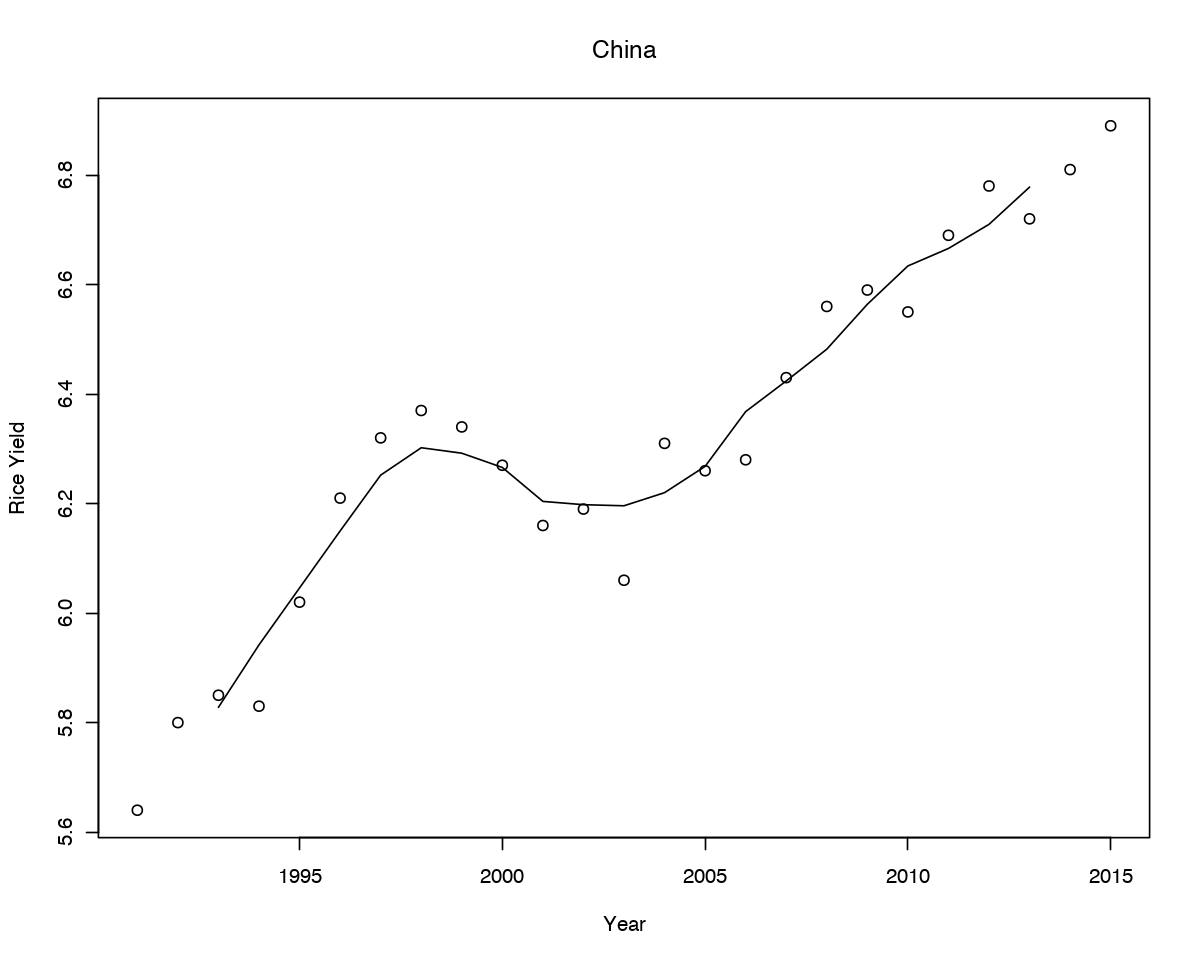

In [79]:
country = 'China'
df_country = subset(df,COUNTRY==country)
plot(df_country$YEAR,df_country$YIELD,xlab='Year',ylab='Rice Yield',main=country)
lines(df_country$YEAR,df_country$YIELD_SMA)

# Clustering Climate Groups

Here we attempt to group countries with similar climates i.e. Identify groups having similar monthly/seasonal weather patterns. Why? It might be useful to build different models for each grouping i.e. Lead to better prediction

We first get monthly averages for each country and then cluster on these aggregate values.

Note that I am following the cluster tools used in 
https://www.datanovia.com/en/lessons/data-preparation-and-r-packages-for-cluster-analysis/


In [50]:
# Obtain monthly averages for each country
df_quarter_avg_weather_by_country = aggregate(df[,33:40], by=list(df$COUNTRY), FUN=mean)
rownames(df_quarter_avg_weather_by_country) <- df_quarter_avg_weather_by_country$Group.1
df_quarter_avg_weather_by_country$Group.1 = NULL

In [59]:
df_quarter_avg_weather_by_country[rownames(df_quarter_avg_weather_by_country)=='India',]

,AVG_Q1_TEMP,AVG_Q2_TEMP,AVG_Q3_TEMP,AVG_Q4_TEMP,AVG_Q4_RF,AVG_Q3_RF,AVG_Q2_RF,AVG_Q1_RF
India,20.4549,29.23491,26.85187,21.63799,36.00413,216.3206,79.91926,14.07749


In [62]:
# Calculate median and Inter-quartile ranges 
median_temp = median(as.matrix(df_quarter_avg_weather_by_country))
median_rainfall = median(as.matrix(df_quarter_avg_weather_by_country))

iqr_temp = IQR(as.matrix(df_quarter_avg_weather_by_country))
iqr_rainfall = IQR(as.matrix(df_quarter_avg_weather_by_country))

# Rescale weather data
df_quarter_avg_weather_by_country.rescaled = df_quarter_avg_weather_by_country 
df_quarter_avg_weather_by_country.rescaled[,1:4] = (df_quarter_avg_weather_by_country.rescaled[,1:4] - median_temp)/iqr_temp
df_quarter_avg_weather_by_country.rescaled[,5:8] = (df_quarter_avg_weather_by_country.rescaled[,5:8] - median_rainfall)/iqr_rainfall


In [64]:
#install.packages(c("cluster", "factoextra"))
library(cluster)
library(factoextra)

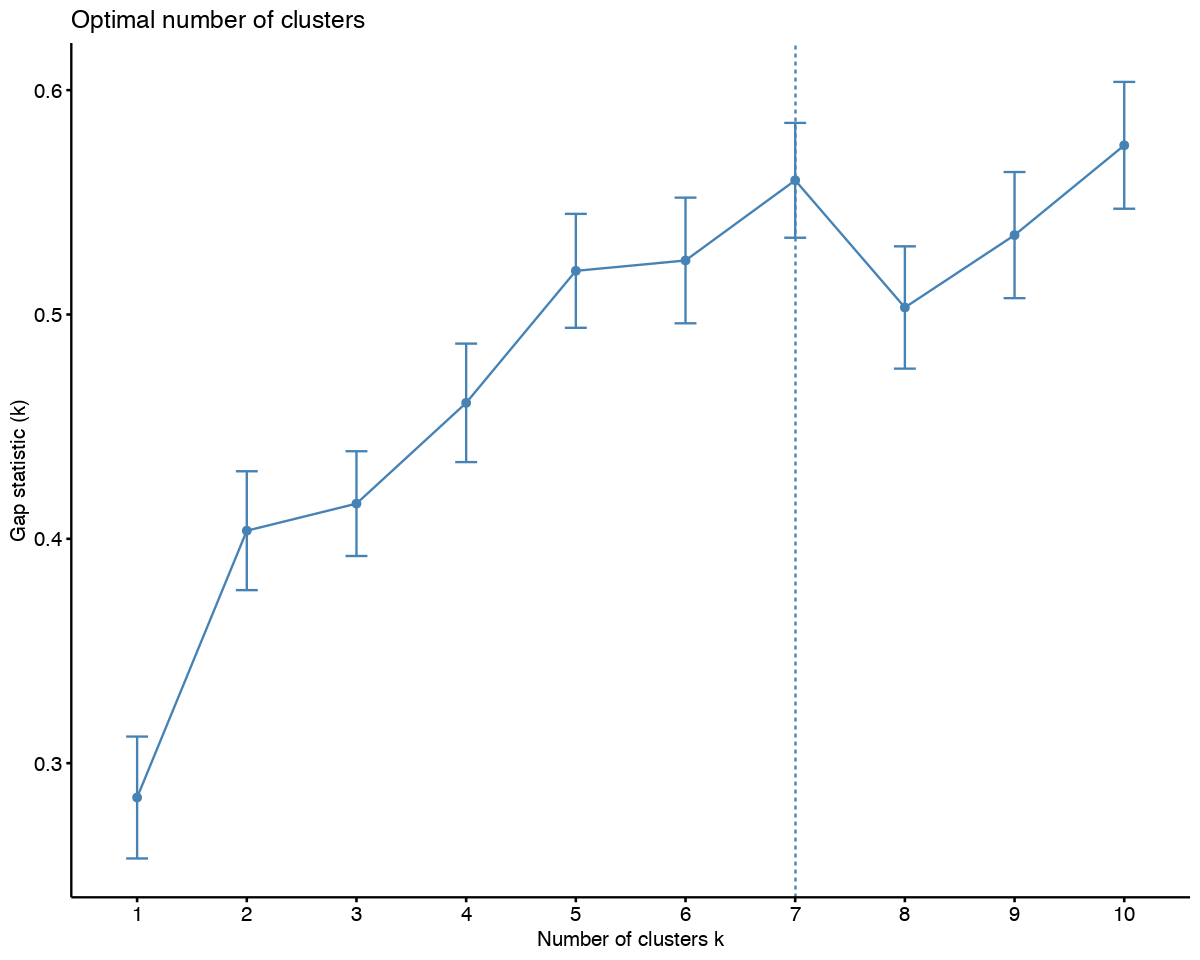

In [65]:
# Determining the optimal number of clusters for kMeans - Returns result of 3 - BUT am taking 3 cluster! 
fviz_nbclust(df_quarter_avg_weather_by_country.rescaled, kmeans, method = "gap_stat")

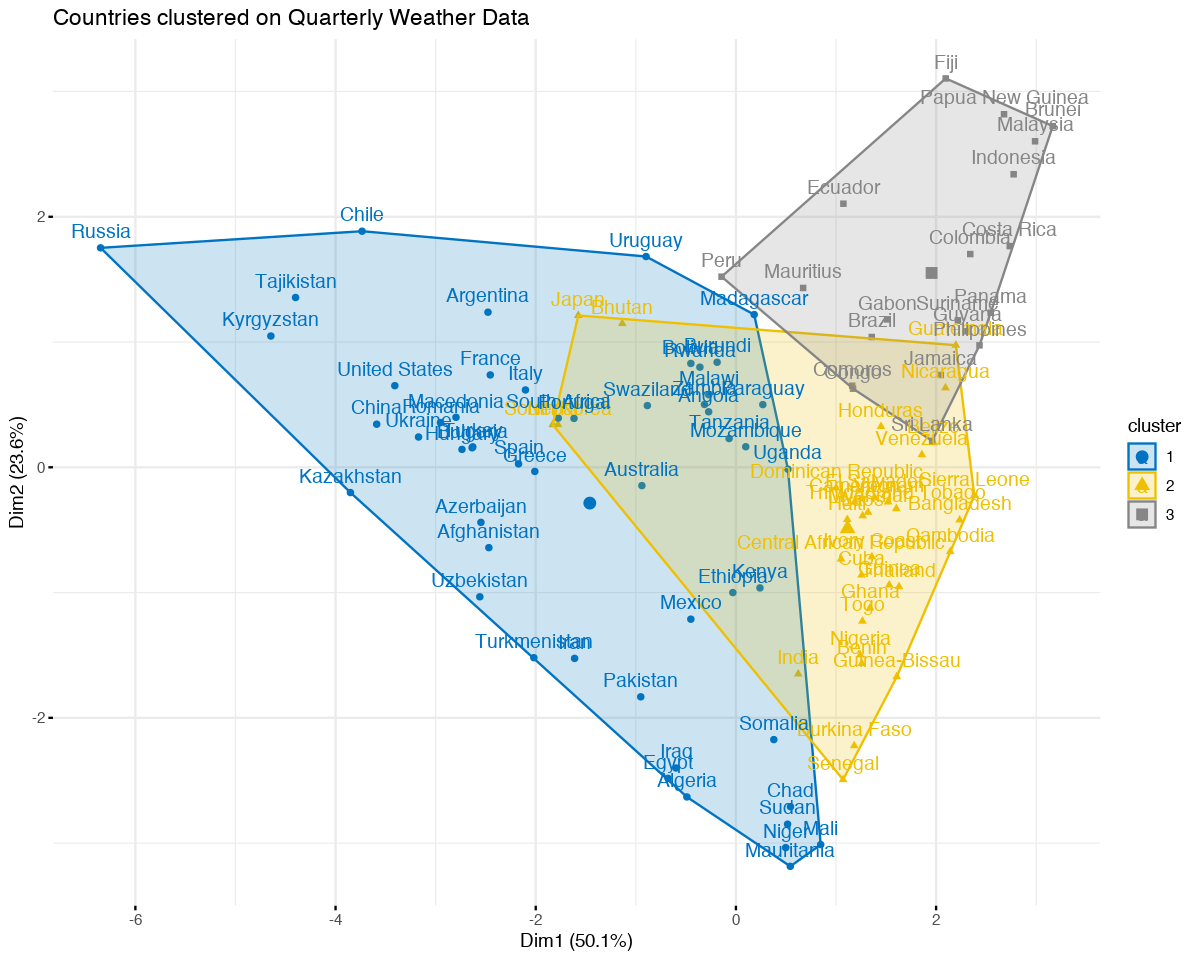

In [66]:
set.seed(123)
km.res <- kmeans(df_quarter_avg_weather_by_country.rescaled, 3, nstart = 25)

# Visualize
fviz_cluster(km.res, data = df_quarter_avg_weather_by_country.rescaled, palette = "jco", ggtheme = theme_minimal(),main="Countries clustered on Quarterly Weather Data")


In [67]:
km.res$centers

,AVG_Q1_TEMP,AVG_Q2_TEMP,AVG_Q3_TEMP,AVG_Q4_TEMP,AVG_Q4_RF,AVG_Q3_RF,AVG_Q2_RF,AVG_Q1_RF
1,-0.26772568,-0.13403446,-0.09246312,-0.22590190,0.6249706,0.2639805,0.3940178,0.7637238
2,-0.07623689,-0.00846515,-0.02010674,-0.06658775,1.3892843,4.5635209,2.4772131,0.1543981
3,-0.02291606,-0.02423616,-0.03667925,-0.02716201,3.7226016,2.7417080,3.5689699,3.3848979


# Don't forget to execute this!!

In [192]:
# Obtain monthly averages for each country
df_avg_weather_by_country = aggregate(df[,9:32], by=list(df$COUNTRY), FUN=mean)
rownames(df_avg_weather_by_country) <- df_avg_weather_by_country$Group.1
df_avg_weather_by_country$Group.1 = NULL

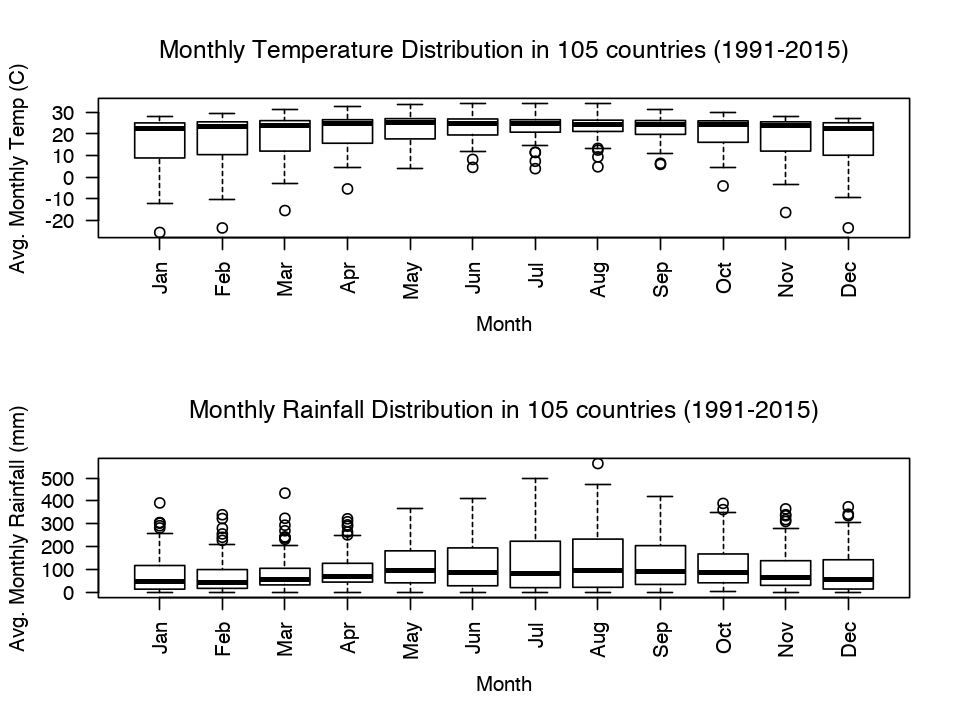

In [131]:
# Change plot size 
options(repr.plot.width=8, repr.plot.height=6)
par(mfrow=c(2,1))
monthlyLabels = c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
boxplot(df_avg_weather_by_country[,1:12],las=2,xlab='Month',ylab='Avg. Monthly Temp (C)',main='Monthly Temperature Distribution in 105 countries (1991-2015)',names=monthlyLabels)
boxplot(df_avg_weather_by_country[,13:24],las=2,xlab='Month',ylab='Avg. Monthly Rainfall (mm)',main='Monthly Rainfall Distribution in 105 countries (1991-2015)',names=monthlyLabels)


# Do NOT standardise the weather data!

Here I cluster on temperature and rainfall separately. Because the weather data is all on the same scale (e.g. Celsius), there is NO NEED to standardise the data before clustering! The results seem intuitive.

In [82]:
#install.packages(c("cluster", "factoextra"))
library(cluster)
library(factoextra)

# Temperature

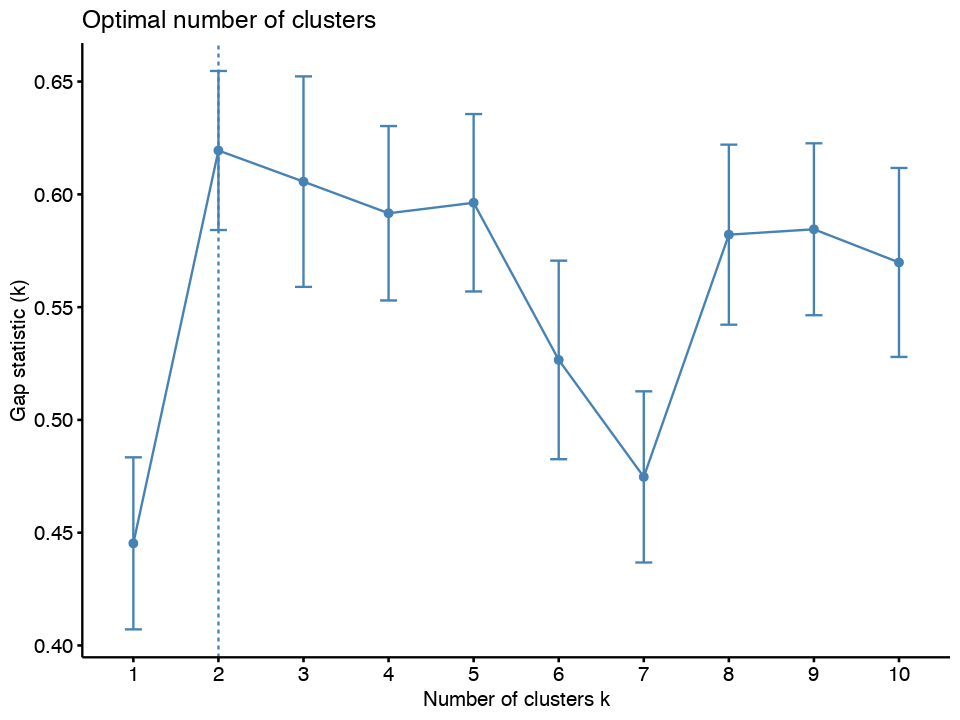

In [193]:
# Standardise data - NOT!
df_avg_temps_by_country <- df_avg_weather_by_country[,1:12]

# Determining the optimal number of clusters for kMeans - Return result of 2  
fviz_nbclust(df_avg_temps_by_country, kmeans, method = "gap_stat")


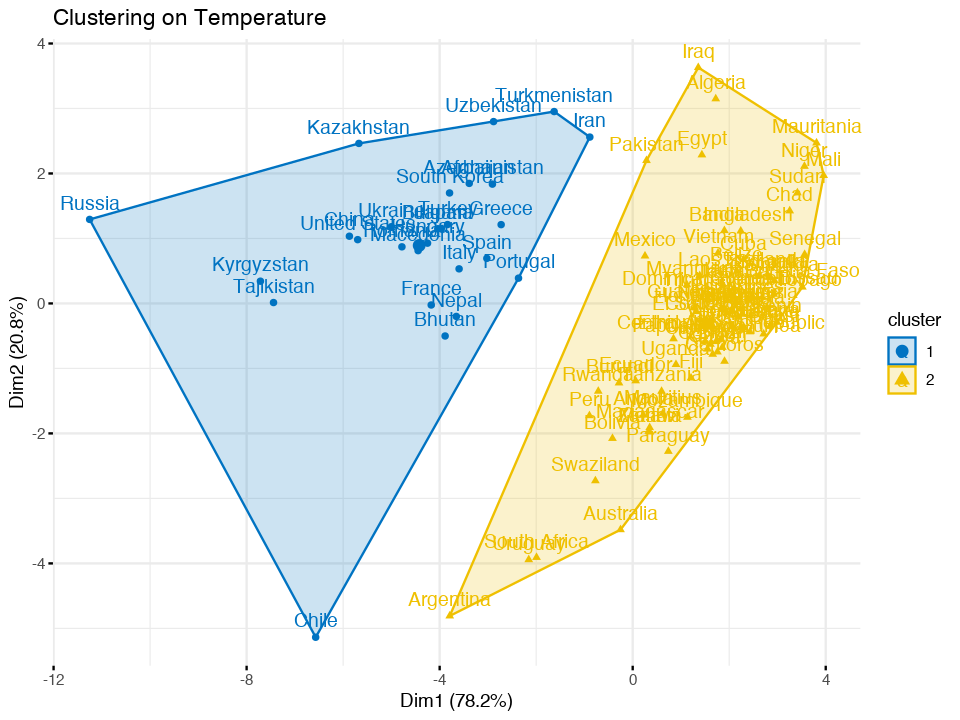

In [27]:
set.seed(123)
km.res <- kmeans(df_avg_temps_by_country, 2, nstart = 25)

# Visualize
fviz_cluster(km.res, data = df_avg_temps_by_country, palette = "jco", ggtheme = theme_minimal(),main="Clustering on Temperature")


In [28]:
# We can see that cluster 1 corresponds to countries with very cold winters! 
# whereas countries in cluster 2 have relatively constant temperatures all year round 
km.res$centers

,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,AVG_TEMP_APR,AVG_TEMP_MAY,AVG_TEMP_JUN,AVG_TEMP_JUL,AVG_TEMP_AUG,AVG_TEMP_SEP,AVG_TEMP_OCT,AVG_TEMP_NOV,AVG_TEMP_DEC
1,-0.9139926,0.5358739,5.024352,10.34044,15.06090,19.14154,21.35687,20.93695,16.77355,11.37797,5.346329,0.6298041
2,23.1036175,24.0192731,25.053218,25.63015,25.50423,24.93585,24.43408,24.60031,24.96212,24.99278,24.172229,23.2660561


# Rainfall - Always execute this!

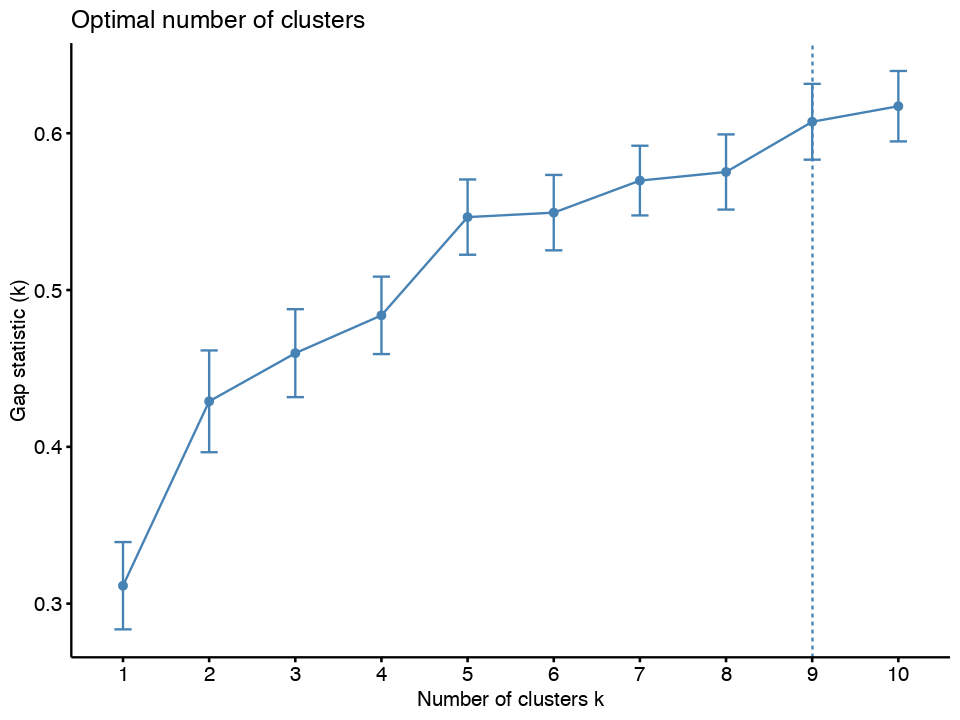

In [194]:
# Standardise data - NOT
df_avg_rainfalls_by_country <- df_avg_weather_by_country[,13:24]

# Determining the optimal number of clusters for kMeans - Returns result of 3 
fviz_nbclust(df_avg_rainfalls_by_country, kmeans, method = "gap_stat")


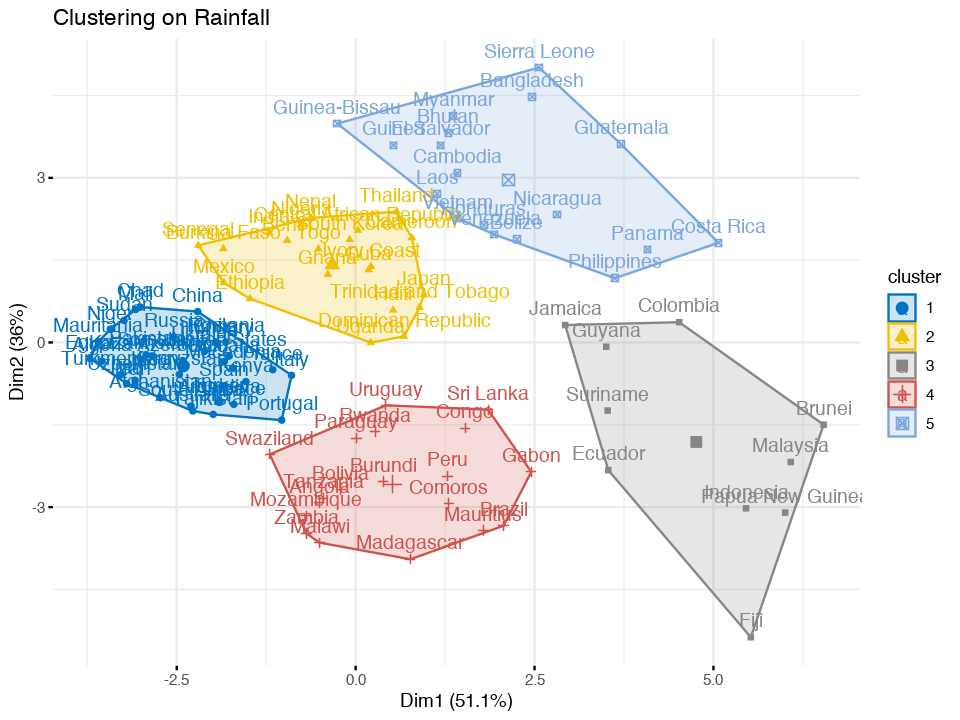

In [30]:
set.seed(123)
km.res <- kmeans(df_avg_rainfalls_by_country, 5, nstart = 25)

# Visualize
fviz_cluster(km.res, data = df_avg_rainfalls_by_country, palette = "jco", ggtheme = theme_minimal(),main="Clustering on Rainfall")


In [31]:
km.res$centers

,AVG_RF_JAN,AVG_RF_FEB,AVG_RF_MAR,AVG_RF_APR,AVG_RF_MAY,AVG_RF_JUN,AVG_RF_JUL,AVG_RF_AUG,AVG_RF_SEP,AVG_RF_OCT,AVG_RF_NOV,AVG_RF_DEC
1,36.09365,34.18831,37.24999,39.15727,40.64419,36.09048,36.99857,38.1768,33.57962,38.06907,38.92556,38.88848
2,25.45753,27.94582,48.78282,82.33662,123.05780,146.71488,180.68599,196.8030,179.30427,123.92047,59.27558,32.77158
3,235.20043,214.43647,246.64240,256.29418,283.77827,220.17059,207.67869,188.4369,169.10708,203.72349,220.65175,246.26929
4,180.33258,166.91982,167.73392,123.96985,82.71171,47.91410,37.68297,39.0977,61.43760,103.20611,136.90127,163.70256
5,51.05096,35.94174,45.63892,86.57496,204.60636,283.72118,321.15904,343.4815,298.66625,242.82519,133.65028,75.21504


# Temperature and Rainfall
We want to put temperature and rainfall values on the same scale. So I calculated

1. The median (med) and interquartile range (IQR) of all the temperature values
2. The median and interquartile range of all the rainfall values

I then rescaled the temperature and rainfall values separately using the transformation (x_i-med)/IQR

Clustering was then run on these rescaled temperature and rainfall values

In [195]:
# Calculate median and Inter-quartile ranges 
median_temp = median(as.matrix(df_avg_temps_by_country))
median_rainfall = median(as.matrix(df_avg_rainfalls_by_country))

iqr_temp = IQR(as.matrix(df_avg_temps_by_country))
iqr_rainfall = IQR(as.matrix(df_avg_rainfalls_by_country))

# Rescale weather data
df_avg_weather_by_country.rescaled = df_avg_weather_by_country 
df_avg_weather_by_country.rescaled[,1:12] = (df_avg_weather_by_country.rescaled[,1:12] - median_temp)/iqr_temp
df_avg_weather_by_country.rescaled[,13:24] = (df_avg_weather_by_country.rescaled[,13:24] - median_rainfall)/iqr_rainfall


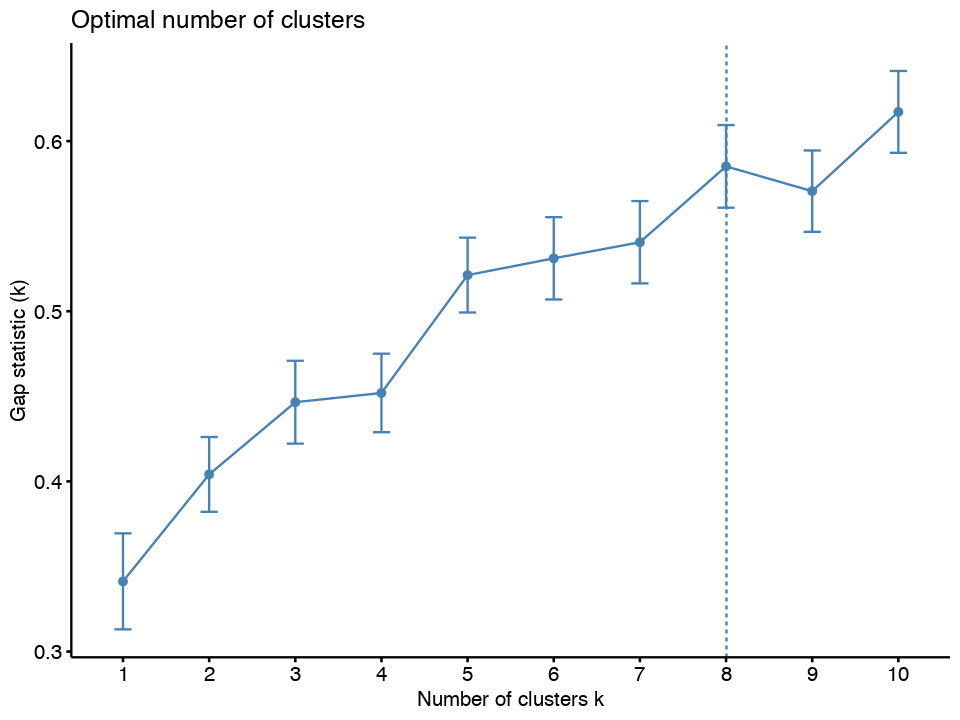

In [196]:
# Determining the optimal number of clusters for kMeans - Returns result of 3 - BUT am taking 3 cluster! 
fviz_nbclust(df_avg_weather_by_country.rescaled, kmeans, method = "gap_stat")

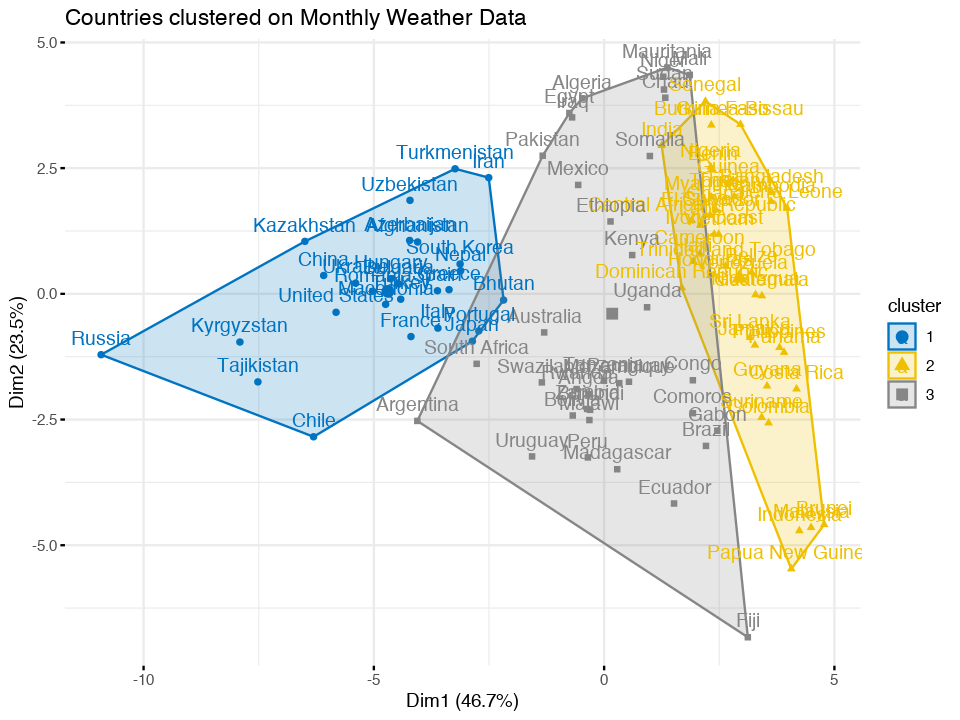

In [153]:
set.seed(123)
km.res <- kmeans(df_avg_weather_by_country.rescaled, 3, nstart = 25)

# Visualize
fviz_cluster(km.res, data = df_avg_weather_by_country.rescaled, palette = "jco", ggtheme = theme_minimal(),main="Countries clustered on Monthly Weather Data")


In [197]:
# Let us look at the centers of each cluster 
# Note that I have transformed the coordinates back to the original scale (Celsius and millimetres) 
# for ease of interpretation
cluster_centres = km.res$centers
cluster_centres[,1:12] = median_temp + (iqr_temp*cluster_centres[,1:12])
cluster_centres[,13:24] = median_rainfall + (iqr_rainfall*cluster_centres[,13:24])
cluster_centres

,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,AVG_TEMP_APR,AVG_TEMP_MAY,AVG_TEMP_JUN,AVG_TEMP_JUL,AVG_TEMP_AUG,AVG_TEMP_SEP,AVG_TEMP_OCT,⋯,AVG_RF_MAR,AVG_RF_APR,AVG_RF_MAY,AVG_RF_JUN,AVG_RF_JUL,AVG_RF_AUG,AVG_RF_SEP,AVG_RF_OCT,AVG_RF_NOV,AVG_RF_DEC
1,-0.9139926,0.5358739,5.024352,10.34044,15.06090,19.14154,21.35687,20.93695,16.77355,11.37797,⋯,46.37633,54.53914,64.55288,73.13713,81.12206,71.22311,61.48687,51.97886,46.65562,45.42754
2,24.0359879,25.1488650,26.427381,27.23361,27.16674,26.63539,26.08088,25.93994,26.02402,25.98844,⋯,79.80640,114.83842,192.15828,217.47123,237.41794,256.44858,233.07965,202.88168,132.21445,97.43469
3,21.9672502,22.6808928,23.473940,23.82931,23.68084,23.09932,22.66812,23.19086,23.86149,23.93736,⋯,110.86165,89.66226,65.13080,43.18670,45.18882,47.97957,51.79083,69.76430,85.06078,100.09433


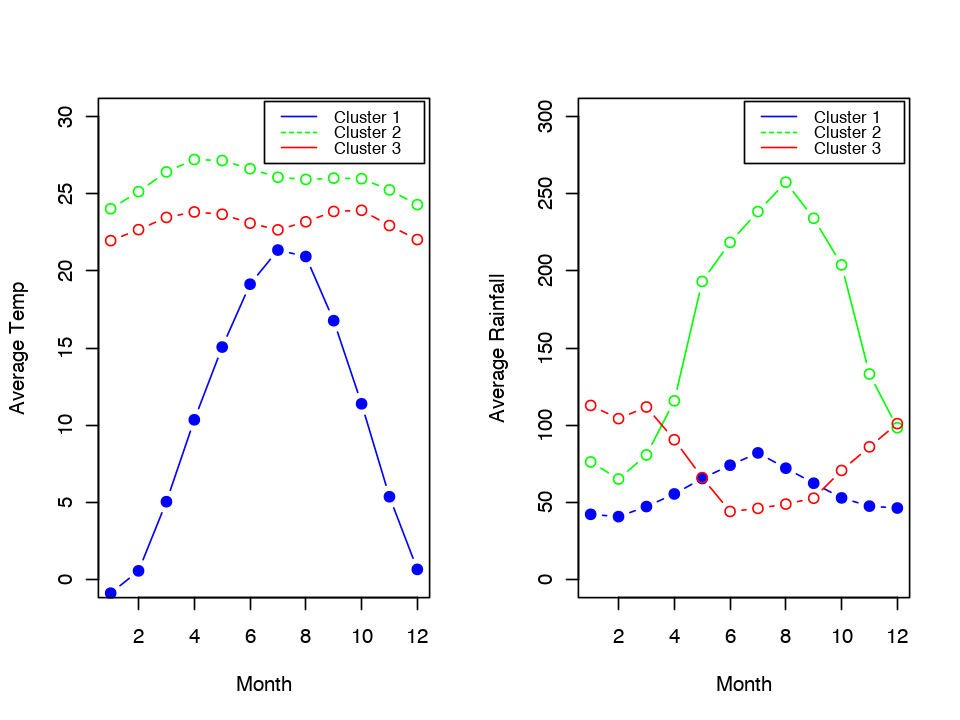

In [136]:
# Trend over Time plot for cluster monthly temperatures and rainfall
par(mfrow=c(1,2))

plot(1:12,cluster_centres[1,1:12],type='b',col='blue',pch=19,ylim=c(0,30),xlab='Month',ylab='Average Temp')
lines(1:12,cluster_centres[2,1:12],type='b',col='green')
lines(1:12,cluster_centres[3,1:12],type='b',col='red')
legend(6.5,31,legend = c("Cluster 1", "Cluster 2","Cluster 3"),col=c('blue','green','red'),lty=1:2, cex=0.8)

plot(1:12,cluster_centres[1,13:24],type='b',col='blue',pch=19,ylim=c(0,300),xlab='Month',ylab='Average Rainfall')
lines(1:12,cluster_centres[2,13:24],type='b',col='green')
lines(1:12,cluster_centres[3,13:24],type='b',col='red')
legend(6.5,310,legend = c("Cluster 1", "Cluster 2","Cluster 3"),col=c('blue','green','red'),lty=1:2, cex=0.8)


In [88]:
# Cluster 1 Countries
names(km.res$cluster[km.res$cluster==1])

[1] "Afghanistan"   "Azerbaijan"    "Bhutan"        "Bulgaria"     
 [5] "Chile"         "China"         "France"        "Greece"       
 [9] "Hungary"       "Iran"          "Italy"         "Japan"        
[13] "Kazakhstan"    "South Korea"   "Kyrgyzstan"    "Macedonia"    
[17] "Nepal"         "Portugal"      "Romania"       "Russia"       
[21] "Spain"         "Tajikistan"    "Turkey"        "Turkmenistan" 
[25] "Ukraine"       "United States" "Uzbekistan"

In [38]:
# Cluster 2 Countries
names(km.res$cluster[km.res$cluster==2])

[1] "Algeria"      "Angola"       "Argentina"    "Australia"    "Bolivia"     
 [6] "Brazil"       "Burundi"      "Chad"         "Comoros"      "Congo"       
[11] "Ecuador"      "Egypt"        "Ethiopia"     "Fiji"         "Gabon"       
[16] "Iraq"         "Kenya"        "Madagascar"   "Malawi"       "Mali"        
[21] "Mauritania"   "Mauritius"    "Mexico"       "Mozambique"   "Niger"       
[26] "Pakistan"     "Paraguay"     "Peru"         "Rwanda"       "Somalia"     
[31] "South Africa" "Sudan"        "Swaziland"    "Tanzania"     "Uganda"      
[36] "Uruguay"      "Zambia"

In [39]:
# Cluster 3 Countries
names(km.res$cluster[km.res$cluster==3])

[1] "Bangladesh"               "Belize"                  
 [3] "Benin"                    "Brunei"                  
 [5] "Burkina Faso"             "Cambodia"                
 [7] "Cameroon"                 "Central African Republic"
 [9] "Colombia"                 "Costa Rica"              
[11] "Ivory Coast"              "Cuba"                    
[13] "Dominican Republic"       "El Salvador"             
[15] "Ghana"                    "Guatemala"               
[17] "Guinea"                   "Guinea-Bissau"           
[19] "Guyana"                   "Haiti"                   
[21] "Honduras"                 "India"                   
[23] "Indonesia"                "Jamaica"                 
[25] "Laos"                     "Malaysia"                
[27] "Myanmar"                  "Nicaragua"               
[29] "Nigeria"                  "Panama"                  
[31] "Papua New Guinea"         "Philippines"             
[33] "Senegal"                  "Sierra Leone"            
[35] "Sri Lanka"                "Suriname"                
[37] "Thailand"                 "Togo"                    
[39] "Trinidad and Tobago"      "Venezuela"               
[41] "Vietnam"

# Cluster Analysis: Conclusion

Here are my interpretations for each cluster above:

Cluster 1: Very cold winters with constant low rainfall (27 countries - Europe, US, China, Korea, Japan)

Cluster 2: Warm all year round with good winter rainfall (37 countries - Principally South American and African countries. No European countries and only Asian are Iraq and Pakistan)

Cluster 3: Hot all year round and with very heavy summer rainfall (41 countries - Asian countries like Bangladesh, Cambodia, India, Thailand, Vietnam + African and South American)

NOTE: More work may needed to be done here. For example, countries in the southern hemisphere have their seasons inverted i.e. Summer weather is in December! It may therefore be more appropriate to switch their monthly data columns around so that everything is aligned?

# Rice Yield Cluster Analysis

Let us examine the rice yield in each cluster to see if there is any differences

In [198]:
# Append the cluster id to the master dataframe
df$cluster_id = NA

for (i in 1:3)
 {
  countries_in_cluster = names(km.res$cluster[km.res$cluster==i])
  df$cluster_id[df$COUNTRY %in% countries_in_cluster] = i 
 }


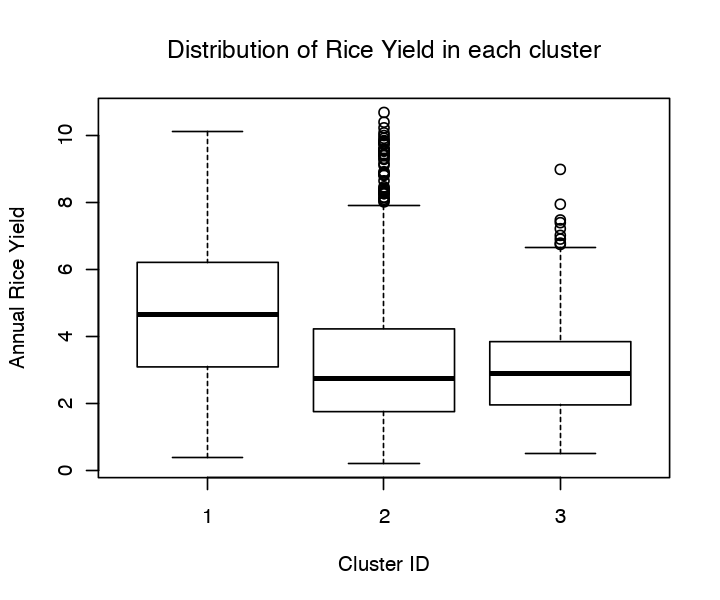

In [90]:
# Change plot size 
options(repr.plot.width=6, repr.plot.height=5)

# Simple boxplot of yield values in each cluster
boxplot(df$YIELD ~ df$cluster_id,xlab='Cluster ID',ylab='Annual Rice Yield',main='Distribution of Rice Yield in each cluster')


Surprisingly perhaps, the cluster with the highest median rice yield is cluster 1. These are the coldest countries with relatively little rainfall. As can be seen in the density plots below, it is bi-modal unlike the other two clusters.

Cluster 3, the hottest and wettest countries do not produce high rice yields! 


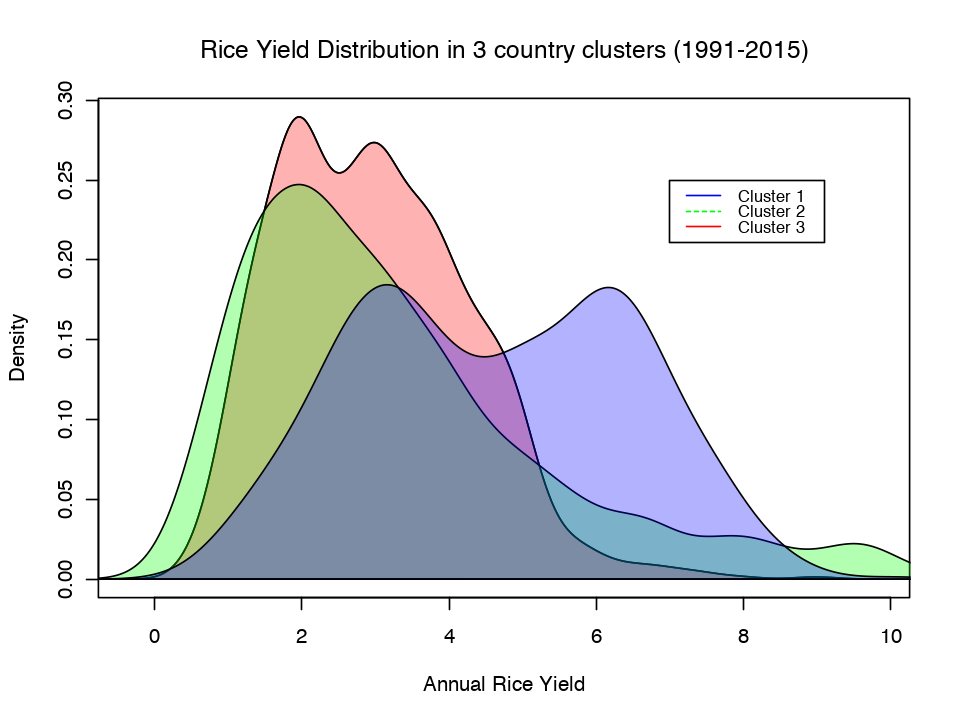

In [42]:
# Change plot size 
options(repr.plot.width=8, repr.plot.height=6)

plot(density(df[df$cluster_id==3,'YIELD']),xlab='Annual Rice Yield',main='Rice Yield Distribution in 3 country clusters (1991-2015)')
polygon(density(df[df$cluster_id==3,'YIELD']), col=rgb(1, 0, 0, 0.3))
polygon(density(df[df$cluster_id==2,'YIELD']), col=rgb(0, 1, 0, 0.3))
polygon(density(df[df$cluster_id==1,'YIELD']), col=rgb(0, 0, 1, 0.3))
legend(7,0.25,legend = c("Cluster 1", "Cluster 2","Cluster 3"),col=c('blue','green','red'),lty=1:2, cex=0.8)



Rather than looking at rice yield, which essentially quantifies the efficiency of the rice growing process, let us instead look at the volumes of rice produced in the three clusters.

Below I show the distributions of the annual rice production in the three clusters and perhaps more informatively a  plot showing the mean rice production in these 3 clusters over 25 years.  

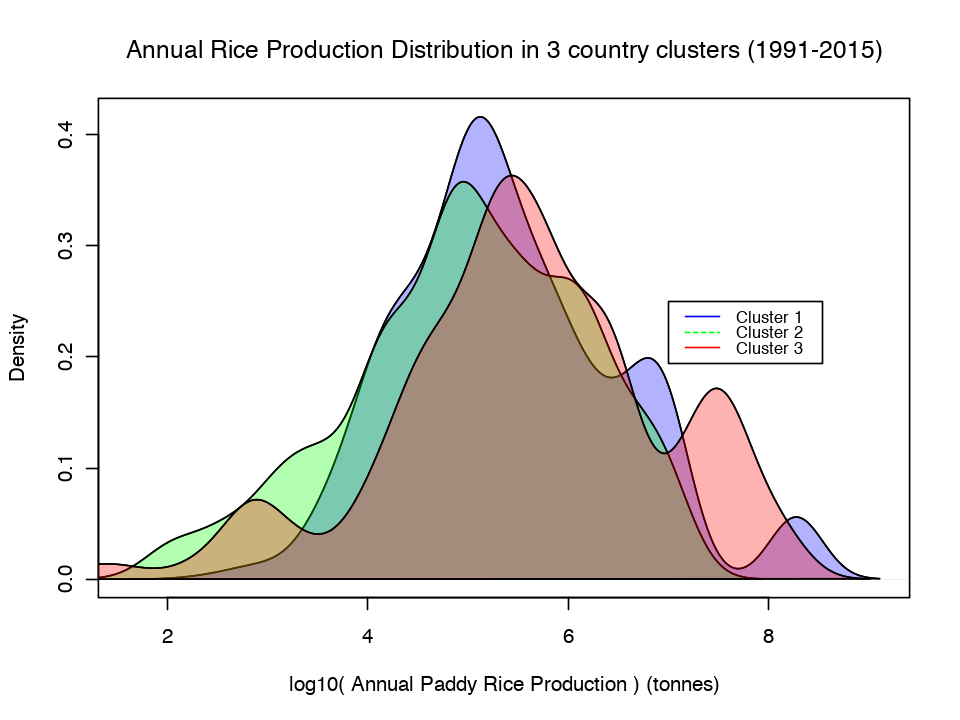

In [43]:
# Change plot size 
options(repr.plot.width=8, repr.plot.height=6)

# Remove Mauritius because it has 15 NA production values
df_production = df[df$COUNTRY!='Mauritius',]
df_production=droplevels(df_production)

plot(density(log10(df_production[df_production$cluster_id==1,'PRODUCTION'])),xlab='log10( Annual Paddy Rice Production ) (tonnes)',main='Annual Rice Production Distribution in 3 country clusters (1991-2015)')
polygon(density(log10(df_production[df_production$cluster_id==1,'PRODUCTION'])), col=rgb(0, 0, 1, 0.3))
lines(density(log10(df_production[df_production$cluster_id==2,'PRODUCTION'])))
polygon(density(log10(df_production[df_production$cluster_id==2,'PRODUCTION'])), col=rgb(0, 1, 0, 0.3))
lines(density(log10(df_production[df_production$cluster_id==3,'PRODUCTION'])))
polygon(density(log10(df_production[df_production$cluster_id==3,'PRODUCTION'])), col=rgb(1, 0, 0, 0.3))
legend(7,0.25,legend = c("Cluster 1", "Cluster 2","Cluster 3"),col=c('blue','green','red'),lty=1:2, cex=0.8)


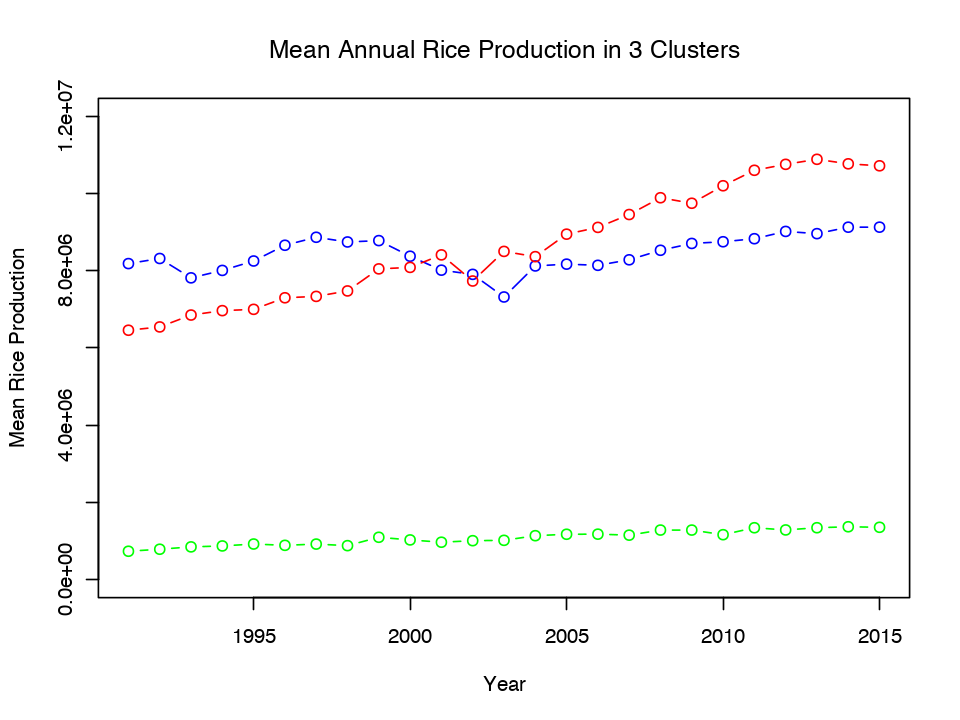

In [44]:
# Group by cluster and year and calculate mean rice production
df_avg_production = aggregate(df_production$PRODUCTION, by=list(df_production$cluster_id,df_production$YEAR), FUN=mean)

# Rename columns
names(df_avg_production) = c('cluster_id','YEAR','MEAN_CLUSTER_PRODUCTION')

# Plot Trend over Time chart for mean rice production in each cluster
cl1 = subset(df_avg_production,cluster_id==1)
cl2 = subset(df_avg_production,cluster_id==2)
cl3 = subset(df_avg_production,cluster_id==3)


plot(cl2$YEAR,cl2$MEAN_CLUSTER_PRODUCTION,type='b',col='green',ylim=c(0,12000000),xlab='Year',ylab='Mean Rice Production',main='Mean Annual Rice Production in 3 Clusters')
lines(cl1$YEAR,cl1$MEAN_CLUSTER_PRODUCTION,type='b',col='blue')
lines(cl3$YEAR,cl3$MEAN_CLUSTER_PRODUCTION,type='b',col='red')


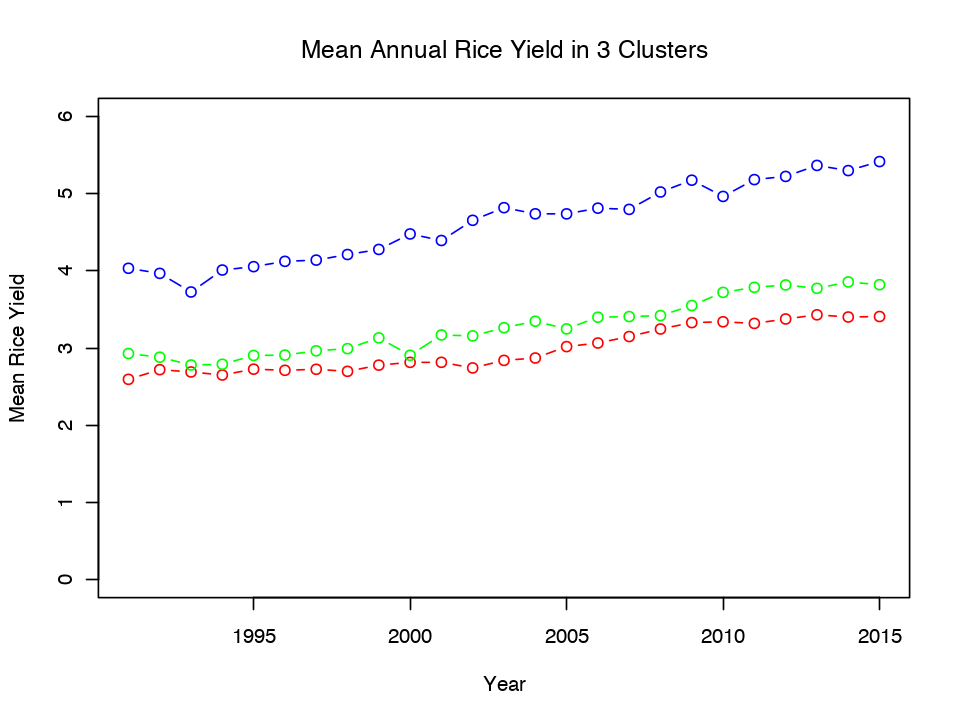

In [45]:
# Group by cluster and year and calculate mean rice yield
df_avg_yield = aggregate(df$YIELD, by=list(df$cluster_id,df$YEAR), FUN=mean)

# Rename columns
names(df_avg_yield) = c('cluster_id','YEAR','MEAN_CLUSTER_YIELD')

# Plot Trend over Time chart for mean rice production in each cluster
cl1 = subset(df_avg_yield,cluster_id==1)
cl2 = subset(df_avg_yield,cluster_id==2)
cl3 = subset(df_avg_yield,cluster_id==3)


plot(cl3$YEAR,cl3$MEAN_CLUSTER_YIELD,type='b',col='red',ylim=c(0,6),xlab='Year',ylab='Mean Rice Yield',main='Mean Annual Rice Yield in 3 Clusters')
lines(cl2$YEAR,cl2$MEAN_CLUSTER_YIELD,type='b',col='green')
lines(cl1$YEAR,cl1$MEAN_CLUSTER_YIELD,type='b',col='blue')


The above two plots are perhaps the most informative. The hot and very wet summers of cluster 3 countries produce the lowest yields, but they still produce the majority of the worlds rice!

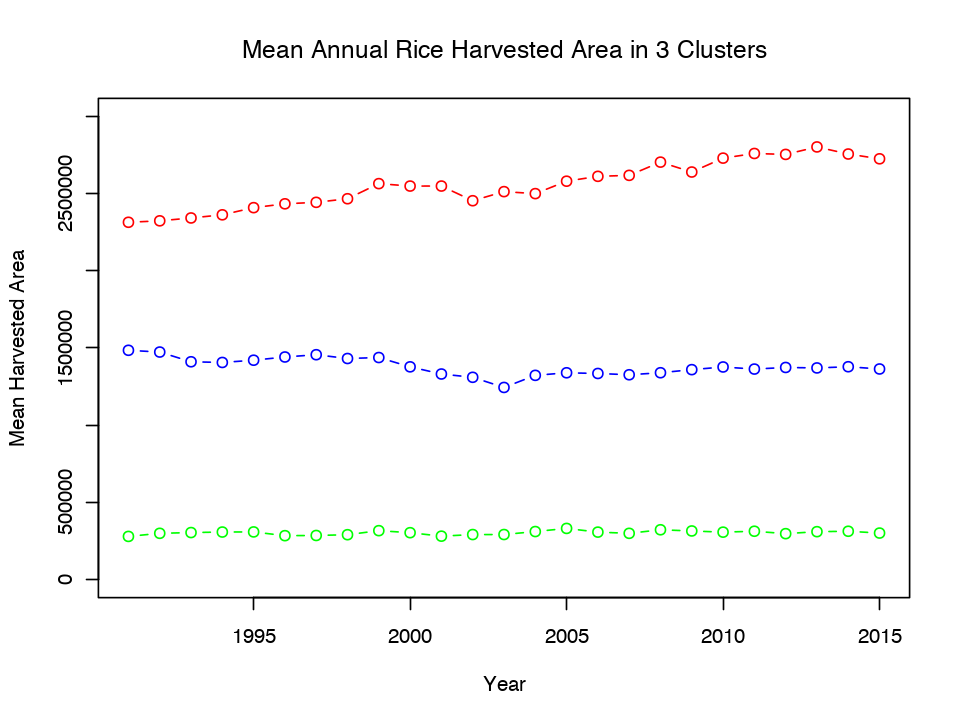

In [46]:
# Group by cluster and year and calculate mean rice yield
df_avg_harvest_area = aggregate(df$HARV_AREA, by=list(df$cluster_id,df$YEAR), FUN=mean)

# Rename columns
names(df_avg_harvest_area) = c('cluster_id','YEAR','MEAN_CLUSTER_HARV_AREA')

# Plot Trend over Time chart for mean rice production in each cluster
cl1 = subset(df_avg_harvest_area,cluster_id==1)
cl2 = subset(df_avg_harvest_area,cluster_id==2)
cl3 = subset(df_avg_harvest_area,cluster_id==3)


plot(cl3$YEAR,cl3$MEAN_CLUSTER_HARV_AREA,type='b',col='red',ylim=c(0,3000000),xlab='Year',ylab='Mean Harvested Area',main='Mean Annual Rice Harvested Area in 3 Clusters')
lines(cl2$YEAR,cl2$MEAN_CLUSTER_HARV_AREA,type='b',col='green')
lines(cl1$YEAR,cl1$MEAN_CLUSTER_HARV_AREA,type='b',col='blue')


# Weather Effects on Rice Yield

Let us leave the clustering behind for now and focus on our main objective. That is, attempting to answer the question:

Does the weather affect the rice yield?

Here we detrend the rice yield to remove any long term systematic changes and attempt to build a model which predicts the detrended rice yield using rescaled weather data. 

Specifically, we calculate:

1. Detrended Rice Yield = Y / sd(Y) where Y = Rice Yield - SMA(Rice Yield)
2. Rescaled Weather Data = ( X_i - mean(X_i) )/sd(X_i)


In [163]:
sum(is.na(df_detrended))

[1] 32469

In [161]:
dim(df_detrended)

[1] 2600  171

In [199]:
# Create new data frame 
df_detrended = df

# Columns to detrend
column_names = c('YIELD','PRODUCTION','AVG_TEMP_JAN','AVG_TEMP_FEB','AVG_TEMP_MAR','AVG_TEMP_APR','AVG_TEMP_MAY','AVG_TEMP_JUN','AVG_TEMP_JUL','AVG_TEMP_AUG','AVG_TEMP_SEP','AVG_TEMP_OCT','AVG_TEMP_NOV','AVG_TEMP_DEC','AVG_RF_JAN','AVG_RF_FEB','AVG_RF_MAR','AVG_RF_APR','AVG_RF_MAY','AVG_RF_JUN','AVG_RF_JUL','AVG_RF_AUG','AVG_RF_SEP','AVG_RF_OCT','AVG_RF_NOV','AVG_RF_DEC')

# Add detrended columns
for (col_name in column_names)
 {
  detrended_col_name = paste(col_name,'_SMA',sep="")
  df_detrended = get_sma_for_column(df_detrended,newColName=detrended_col_name,colName=col_name,n=5)
}

# Calculate deviations from SMA values
for (col_name in column_names)
 {
  sma_col_name = paste(col_name,'_SMA',sep="")
  deviation_col_name = paste(col_name,'_DEV',sep="")
  df_detrended[deviation_col_name]  = df_detrended[col_name] - df_detrended[sma_col_name]
}

# Add new empty columns to data frame
for (col_name in column_names)
 {
  mean_deviation_col_name = paste(col_name,'_DEV_MEAN',sep="")
  sd_deviation_col_name = paste(col_name,'_DEV_SD',sep="")
  z_deviation_col_name = paste(col_name,'_Z',sep="")
    
  df_detrended[mean_deviation_col_name] = NA
  df_detrended[sd_deviation_col_name] = NA
  df_detrended[z_deviation_col_name] = NA
 }


# Obtain and record mean and standard deviation of deviations for each country
for (country in unique(df_detrended$COUNTRY))
 {
  df_country = subset(df_detrended,COUNTRY==country)
    
  for (col_name in column_names)
   {
    deviation_col_name = paste(col_name,'_DEV',sep="")
    mean_deviation_col_name = paste(col_name,'_DEV_MEAN',sep="")
    sd_deviation_col_name = paste(col_name,'_DEV_SD',sep="")
    
    mean_value = mean(df_country[,deviation_col_name],na.rm=T)
    sd_value = sd(df_country[,deviation_col_name],na.rm=T)
      
    df_detrended[,mean_deviation_col_name][df_detrended$COUNTRY==country] = mean_value
    df_detrended[,sd_deviation_col_name][df_detrended$COUNTRY==country] = sd_value 
   }  
 }
    

# Rescale deviations to get effective Z-Scores for rice yield, production and weather data
for (col_name in column_names)
 {
  deviation_col_name = paste(col_name,'_DEV',sep="")
  mean_deviation_col_name = paste(col_name,'_DEV_MEAN',sep="")
  sd_deviation_col_name = paste(col_name,'_DEV_SD',sep="")
  z_deviation_col_name = paste(col_name,'_Z',sep="")
    
  df_detrended[,z_deviation_col_name] = ( df_detrended[,deviation_col_name] - df_detrended[,mean_deviation_col_name] ) / df_detrended[,sd_deviation_col_name]
 }




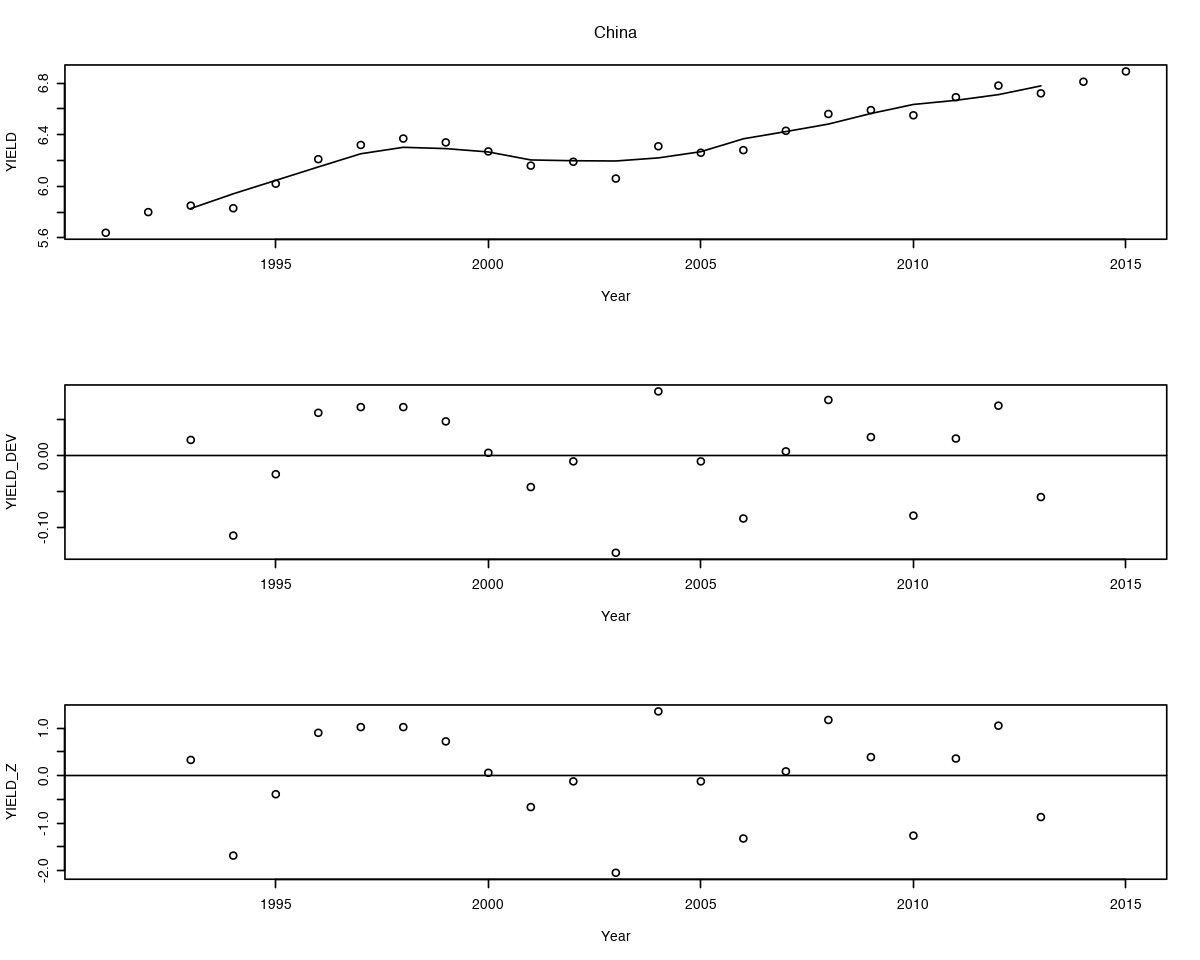

In [92]:
# We plot a few things below
# 1. Raw field value with its Simple Moving Average 
# 2. Deviation of field value from SMA
# 3. Rescaled deviation value

# Change plot size 
options(repr.plot.width=10, repr.plot.height=8)

country = 'China'
col_name = 'YIELD'
sma_col_name = paste(col_name,'_SMA',sep="")
deviation_col_name = paste(col_name,'_DEV',sep="")
z_deviation_col_name = paste(col_name,'_Z',sep="")

df_country = subset(df_detrended,COUNTRY==country)

par(mfrow=c(3,1))
plot(df_country$YEAR,df_country[,col_name],xlab='Year',ylab=col_name,main=country)
lines(df_country$YEAR,df_country[,sma_col_name])
plot(df_country$YEAR,df_country[,deviation_col_name],xlab='Year',ylab=deviation_col_name)
abline(h=0)
plot(df_country$YEAR,df_country[,z_deviation_col_name],xlab='Year',ylab=z_deviation_col_name)
abline(h=0)

# Multiple Linear Regression Model 

We attempt to build regression models that predict the average annual yield based on solely the monthly weather data.

We begin with building a model using ALL the 94 countries in our data set. Later we will build models on each of our individual clusters.

In [105]:
library("corrplot")

corrplot 0.84 loaded


In [106]:
weather_features = c('AVG_TEMP_JAN_Z','AVG_TEMP_FEB_Z','AVG_TEMP_MAR_Z','AVG_TEMP_APR_Z','AVG_TEMP_MAY_Z','AVG_TEMP_JUN_Z',
                     'AVG_TEMP_JUL_Z','AVG_TEMP_AUG_Z','AVG_TEMP_SEP_Z','AVG_TEMP_OCT_Z','AVG_TEMP_NOV_Z','AVG_TEMP_DEC_Z',
                     'AVG_RF_JAN_Z','AVG_RF_FEB_Z','AVG_RF_MAR_Z','AVG_RF_APR_Z','AVG_RF_MAY_Z','AVG_RF_JUN_Z',
                     'AVG_RF_JUL_Z','AVG_RF_AUG_Z','AVG_RF_SEP_Z','AVG_RF_OCT_Z','AVG_RF_NOV_Z','AVG_RF_DEC_Z')

M = cor(df_detrended[,weather_features])

#corrplot(M, method="color")



In [200]:
df_detrended = df_detrended[complete.cases(df_detrended),]
df_detrended=droplevels(df_detrended)

In [201]:
FitAll = lm(YIELD_Z ~ AVG_TEMP_JAN_Z+AVG_TEMP_FEB_Z+AVG_TEMP_MAR_Z+AVG_TEMP_APR_Z+AVG_TEMP_MAY_Z+AVG_TEMP_JUN_Z+AVG_TEMP_JUL_Z+AVG_TEMP_AUG_Z+AVG_TEMP_SEP_Z+AVG_TEMP_OCT_Z+AVG_TEMP_NOV_Z+AVG_TEMP_DEC_Z+AVG_RF_JAN_Z+AVG_RF_FEB_Z+AVG_RF_MAR_Z+AVG_RF_APR_Z+AVG_RF_MAY_Z+AVG_RF_JUN_Z+AVG_RF_JUL_Z+AVG_RF_AUG_Z+AVG_RF_SEP_Z+AVG_RF_OCT_Z+AVG_RF_NOV_Z+AVG_RF_DEC_Z, data=df_detrended)
step(FitAll,direction='backward')


Start:  AIC=-88.75
YIELD_Z ~ AVG_TEMP_JAN_Z + AVG_TEMP_FEB_Z + AVG_TEMP_MAR_Z + 
    AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_JUL_Z + 
    AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_TEMP_OCT_Z + AVG_TEMP_NOV_Z + 
    AVG_TEMP_DEC_Z + AVG_RF_JAN_Z + AVG_RF_FEB_Z + AVG_RF_MAR_Z + 
    AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_JUN_Z + AVG_RF_JUL_Z + 
    AVG_RF_AUG_Z + AVG_RF_SEP_Z + AVG_RF_OCT_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z

                 Df Sum of Sq    RSS     AIC
- AVG_RF_SEP_Z    1    0.0000 2028.6 -90.751
- AVG_RF_JAN_Z    1    0.0002 2028.6 -90.751
- AVG_RF_JUN_Z    1    0.0526 2028.7 -90.695
- AVG_TEMP_SEP_Z  1    0.0681 2028.7 -90.679
- AVG_RF_JUL_Z    1    0.0877 2028.7 -90.658
- AVG_RF_AUG_Z    1    0.1173 2028.7 -90.626
- AVG_TEMP_JUN_Z  1    0.1389 2028.7 -90.603
- AVG_RF_OCT_Z    1    0.1801 2028.8 -90.560
- AVG_TEMP_OCT_Z  1    0.1934 2028.8 -90.545
- AVG_TEMP_AUG_Z  1    0.2675 2028.9 -90.466
- AVG_TEMP_MAR_Z  1    0.3019 2028.9 -90.430
- AVG_RF_FEB_Z    


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_NOV_Z + 
    AVG_RF_MAR_Z + AVG_RF_APR_Z + AVG_RF_NOV_Z + AVG_RF_DEC_Z, 
    data = df_detrended)

Coefficients:
   (Intercept)  AVG_TEMP_APR_Z  AVG_TEMP_MAY_Z  AVG_TEMP_NOV_Z    AVG_RF_MAR_Z  
    -6.630e-18       6.492e-02      -5.334e-02      -5.203e-02       3.570e-02  
  AVG_RF_APR_Z    AVG_RF_NOV_Z    AVG_RF_DEC_Z  
     4.875e-02      -5.607e-02       3.273e-02  


In [202]:
model = lm(formula = YIELD_Z ~ AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_NOV_Z + 
    AVG_RF_MAR_Z + AVG_RF_APR_Z + AVG_RF_NOV_Z + AVG_RF_DEC_Z, data = df_detrended)
summary(model)


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_NOV_Z + 
    AVG_RF_MAR_Z + AVG_RF_APR_Z + AVG_RF_NOV_Z + AVG_RF_DEC_Z, 
    data = df_detrended)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1312 -0.5605  0.0407  0.5851  3.5495 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -6.630e-18  2.088e-02   0.000  1.00000   
AVG_TEMP_APR_Z  6.492e-02  2.443e-02   2.658  0.00792 **
AVG_TEMP_MAY_Z -5.334e-02  2.390e-02  -2.232  0.02574 * 
AVG_TEMP_NOV_Z -5.203e-02  2.191e-02  -2.374  0.01767 * 
AVG_RF_MAR_Z    3.570e-02  2.188e-02   1.632  0.10285   
AVG_RF_APR_Z    4.875e-02  2.221e-02   2.195  0.02824 * 
AVG_RF_NOV_Z   -5.607e-02  2.178e-02  -2.574  0.01012 * 
AVG_RF_DEC_Z    3.273e-02  2.175e-02   1.505  0.13246   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9713 on 2155 degrees of freedom
Multiple R-squared:  0.01311,	Adjusted R-squared:  0.009906 
F-statistic:  4.09 

# All Countries

In [93]:
model = lm(YIELD_Z ~ AVG_TEMP_JAN_Z+AVG_TEMP_FEB_Z+AVG_TEMP_MAR_Z+AVG_TEMP_APR_Z+AVG_TEMP_MAY_Z+AVG_TEMP_JUN_Z+AVG_TEMP_JUL_Z+AVG_TEMP_AUG_Z+AVG_TEMP_SEP_Z+AVG_TEMP_OCT_Z+AVG_TEMP_NOV_Z+AVG_TEMP_DEC_Z+AVG_RF_JAN_Z+AVG_RF_FEB_Z+AVG_RF_MAR_Z+AVG_RF_APR_Z+AVG_RF_MAY_Z+AVG_RF_JUN_Z+AVG_RF_JUL_Z+AVG_RF_AUG_Z+AVG_RF_SEP_Z+AVG_RF_OCT_Z+AVG_RF_NOV_Z+AVG_RF_DEC_Z, data=df_detrended)
summary(model)



Call:
lm(formula = YIELD_Z ~ AVG_TEMP_JAN_Z + AVG_TEMP_FEB_Z + AVG_TEMP_MAR_Z + 
    AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_JUL_Z + 
    AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_TEMP_OCT_Z + AVG_TEMP_NOV_Z + 
    AVG_TEMP_DEC_Z + AVG_RF_JAN_Z + AVG_RF_FEB_Z + AVG_RF_MAR_Z + 
    AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_JUN_Z + AVG_RF_JUL_Z + 
    AVG_RF_AUG_Z + AVG_RF_SEP_Z + AVG_RF_OCT_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z, data = df_detrended)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0956 -0.5577  0.0519  0.5810  3.5350 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)     9.994e-18  2.085e-02   0.000  1.00000   
AVG_TEMP_JAN_Z  1.514e-02  2.425e-02   0.624  0.53242   
AVG_TEMP_FEB_Z -1.580e-02  2.634e-02  -0.600  0.54882   
AVG_TEMP_MAR_Z -1.528e-02  2.629e-02  -0.581  0.56101   
AVG_TEMP_APR_Z  7.767e-02  2.708e-02   2.868  0.00416 **
AVG_TEMP_MAY_Z -5.154e-02  2.657e-02  -1.940  0.05256 . 
AVG_TEMP_JUN_Z -9.647e-03  2

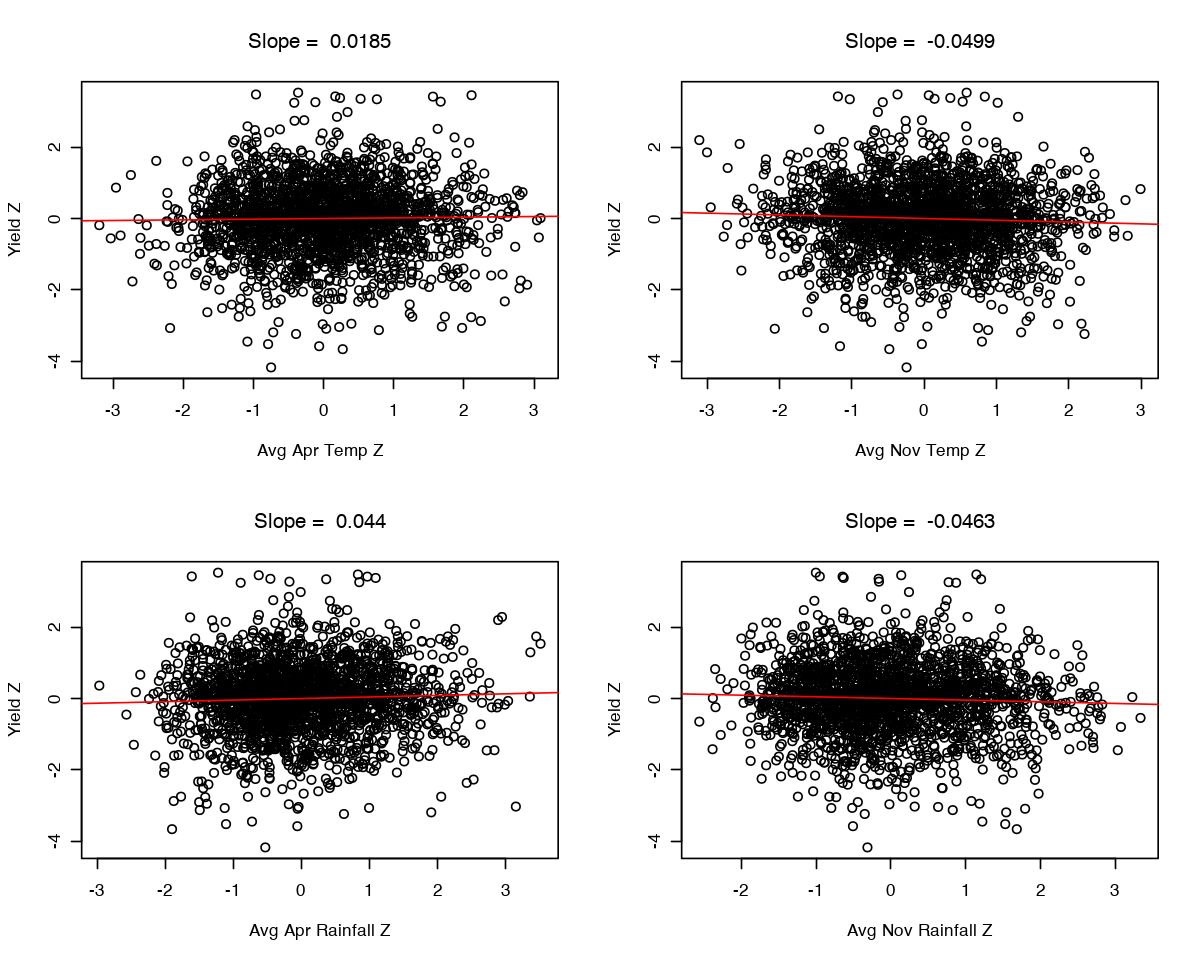

In [94]:
par(mfrow=c(2,2))

model = lm(YIELD_Z ~ AVG_TEMP_APR_Z, data=df_detrended)
intercept = model$coefficients[1]
slope = model$coefficients[2]
plot(df_detrended$AVG_TEMP_APR_Z,df_detrended$YIELD_Z,xlab='Avg Apr Temp Z',ylab='Yield Z',main=paste('Slope = ',round(slope,4)) )
abline(intercept,slope,col='red')

model = lm(YIELD_Z ~ AVG_TEMP_NOV_Z, data=df_detrended)
intercept = model$coefficients[1]
slope = model$coefficients[2]
plot(df_detrended$AVG_TEMP_NOV_Z,df_detrended$YIELD_Z,xlab='Avg Nov Temp Z',ylab='Yield Z',main=paste('Slope = ',round(slope,4)) )
abline(intercept,slope,col='red')

model = lm(YIELD_Z ~ AVG_RF_APR_Z, data=df_detrended)
intercept = model$coefficients[1]
slope = model$coefficients[2]
plot(df_detrended$AVG_RF_APR_Z,df_detrended$YIELD_Z,xlab='Avg Apr Rainfall Z',ylab='Yield Z',main=paste('Slope = ',round(slope,4)) )
abline(intercept,slope,col='red')

model = lm(YIELD_Z ~ AVG_RF_NOV_Z, data=df_detrended)
intercept = model$coefficients[1]
slope = model$coefficients[2]
plot(df_detrended$AVG_RF_NOV_Z,df_detrended$YIELD_Z,xlab='Avg Nov Rainfall Z',ylab='Yield Z',main=paste('Slope = ',round(slope,4)) )
abline(intercept,slope,col='red')
     

In [205]:
# Create data set for each cluster
df_cluster1 = subset(df_detrended,cluster_id==1)
df_cluster2 = subset(df_detrended,cluster_id==2)
df_cluster3 = subset(df_detrended,cluster_id==3)

In [204]:
cluster_centres

,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,AVG_TEMP_APR,AVG_TEMP_MAY,AVG_TEMP_JUN,AVG_TEMP_JUL,AVG_TEMP_AUG,AVG_TEMP_SEP,AVG_TEMP_OCT,⋯,AVG_RF_MAR,AVG_RF_APR,AVG_RF_MAY,AVG_RF_JUN,AVG_RF_JUL,AVG_RF_AUG,AVG_RF_SEP,AVG_RF_OCT,AVG_RF_NOV,AVG_RF_DEC
1,-0.9139926,0.5358739,5.024352,10.34044,15.06090,19.14154,21.35687,20.93695,16.77355,11.37797,⋯,46.37633,54.53914,64.55288,73.13713,81.12206,71.22311,61.48687,51.97886,46.65562,45.42754
2,24.0359879,25.1488650,26.427381,27.23361,27.16674,26.63539,26.08088,25.93994,26.02402,25.98844,⋯,79.80640,114.83842,192.15828,217.47123,237.41794,256.44858,233.07965,202.88168,132.21445,97.43469
3,21.9672502,22.6808928,23.473940,23.82931,23.68084,23.09932,22.66812,23.19086,23.86149,23.93736,⋯,110.86165,89.66226,65.13080,43.18670,45.18882,47.97957,51.79083,69.76430,85.06078,100.09433


# Cluster 1: Very cold winters with constant low rainfall 

In [207]:
FitAll = lm(YIELD_Z ~ AVG_TEMP_JAN_Z+AVG_TEMP_FEB_Z+AVG_TEMP_MAR_Z+AVG_TEMP_APR_Z+AVG_TEMP_MAY_Z+AVG_TEMP_JUN_Z+AVG_TEMP_JUL_Z+AVG_TEMP_AUG_Z+AVG_TEMP_SEP_Z+AVG_TEMP_OCT_Z+AVG_TEMP_NOV_Z+AVG_TEMP_DEC_Z+AVG_RF_JAN_Z+AVG_RF_FEB_Z+AVG_RF_MAR_Z+AVG_RF_APR_Z+AVG_RF_MAY_Z+AVG_RF_JUN_Z+AVG_RF_JUL_Z+AVG_RF_AUG_Z+AVG_RF_SEP_Z+AVG_RF_OCT_Z+AVG_RF_NOV_Z+AVG_RF_DEC_Z, data=df_cluster1)
step(FitAll,direction='backward')

Start:  AIC=-1
YIELD_Z ~ AVG_TEMP_JAN_Z + AVG_TEMP_FEB_Z + AVG_TEMP_MAR_Z + 
    AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_JUL_Z + 
    AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_TEMP_OCT_Z + AVG_TEMP_NOV_Z + 
    AVG_TEMP_DEC_Z + AVG_RF_JAN_Z + AVG_RF_FEB_Z + AVG_RF_MAR_Z + 
    AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_JUN_Z + AVG_RF_JUL_Z + 
    AVG_RF_AUG_Z + AVG_RF_SEP_Z + AVG_RF_OCT_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z

                 Df Sum of Sq    RSS      AIC
- AVG_RF_JUN_Z    1    0.0026 518.23 -2.99758
- AVG_RF_NOV_Z    1    0.0082 518.23 -2.99148
- AVG_TEMP_APR_Z  1    0.0125 518.24 -2.98676
- AVG_TEMP_JAN_Z  1    0.0164 518.24 -2.98244
- AVG_TEMP_SEP_Z  1    0.0169 518.24 -2.98196
- AVG_TEMP_AUG_Z  1    0.0344 518.26 -2.96272
- AVG_TEMP_OCT_Z  1    0.0797 518.31 -2.91324
- AVG_RF_FEB_Z    1    0.0956 518.32 -2.89584
- AVG_TEMP_MAR_Z  1    0.2186 518.44 -2.76125
- AVG_TEMP_FEB_Z  1    0.2362 518.46 -2.74203
- AVG_RF_SEP_Z    1    0.2823 518.51 -2.69161
- AVG_RF_J


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_JUL_Z + AVG_TEMP_NOV_Z + AVG_RF_JAN_Z + 
    AVG_RF_APR_Z + AVG_RF_AUG_Z, data = df_cluster1)

Coefficients:
   (Intercept)  AVG_TEMP_JUL_Z  AVG_TEMP_NOV_Z    AVG_RF_JAN_Z    AVG_RF_APR_Z  
     3.180e-17       1.007e-01      -7.209e-02       6.426e-02       7.871e-02  
  AVG_RF_AUG_Z  
    -7.007e-02  


In [208]:
model = lm(YIELD_Z ~ AVG_TEMP_JUL_Z + AVG_TEMP_NOV_Z + AVG_RF_JAN_Z + AVG_RF_APR_Z + AVG_RF_AUG_Z, data=df_cluster1)
summary(model)



Call:
lm(formula = YIELD_Z ~ AVG_TEMP_JUL_Z + AVG_TEMP_NOV_Z + AVG_RF_JAN_Z + 
    AVG_RF_APR_Z + AVG_RF_AUG_Z, data = df_cluster1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4960 -0.5887  0.0058  0.6693  3.4572 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)     3.180e-17  4.061e-02   0.000   1.0000  
AVG_TEMP_JUL_Z  1.007e-01  4.175e-02   2.412   0.0162 *
AVG_TEMP_NOV_Z -7.209e-02  4.181e-02  -1.724   0.0852 .
AVG_RF_JAN_Z    6.426e-02  4.174e-02   1.539   0.1243  
AVG_RF_APR_Z    7.871e-02  4.197e-02   1.876   0.0612 .
AVG_RF_AUG_Z   -7.007e-02  4.169e-02  -1.681   0.0934 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9669 on 561 degrees of freedom
Multiple R-squared:  0.02871,	Adjusted R-squared:  0.02005 
F-statistic: 3.316 on 5 and 561 DF,  p-value: 0.005825


# Cluster 2: Warm all year round with good winter rainfall

In [209]:
FitAll = lm(YIELD_Z ~ AVG_TEMP_JAN_Z+AVG_TEMP_FEB_Z+AVG_TEMP_MAR_Z+AVG_TEMP_APR_Z+AVG_TEMP_MAY_Z+AVG_TEMP_JUN_Z+AVG_TEMP_JUL_Z+AVG_TEMP_AUG_Z+AVG_TEMP_SEP_Z+AVG_TEMP_OCT_Z+AVG_TEMP_NOV_Z+AVG_TEMP_DEC_Z+AVG_RF_JAN_Z+AVG_RF_FEB_Z+AVG_RF_MAR_Z+AVG_RF_APR_Z+AVG_RF_MAY_Z+AVG_RF_JUN_Z+AVG_RF_JUL_Z+AVG_RF_AUG_Z+AVG_RF_SEP_Z+AVG_RF_OCT_Z+AVG_RF_NOV_Z+AVG_RF_DEC_Z, data=df_cluster2)
step(FitAll,direction='backward')


Start:  AIC=-23.62
YIELD_Z ~ AVG_TEMP_JAN_Z + AVG_TEMP_FEB_Z + AVG_TEMP_MAR_Z + 
    AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_JUL_Z + 
    AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_TEMP_OCT_Z + AVG_TEMP_NOV_Z + 
    AVG_TEMP_DEC_Z + AVG_RF_JAN_Z + AVG_RF_FEB_Z + AVG_RF_MAR_Z + 
    AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_JUN_Z + AVG_RF_JUL_Z + 
    AVG_RF_AUG_Z + AVG_RF_SEP_Z + AVG_RF_OCT_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z

                 Df Sum of Sq    RSS     AIC
- AVG_RF_FEB_Z    1    0.0000 790.44 -25.616
- AVG_TEMP_FEB_Z  1    0.0048 790.45 -25.611
- AVG_RF_SEP_Z    1    0.0071 790.45 -25.608
- AVG_TEMP_JAN_Z  1    0.0118 790.45 -25.603
- AVG_RF_AUG_Z    1    0.0119 790.45 -25.603
- AVG_RF_DEC_Z    1    0.0135 790.46 -25.602
- AVG_RF_JUN_Z    1    0.0403 790.48 -25.572
- AVG_RF_MAR_Z    1    0.0504 790.49 -25.561
- AVG_RF_JAN_Z    1    0.1997 790.64 -25.399
- AVG_RF_NOV_Z    1    0.2508 790.69 -25.343
- AVG_TEMP_DEC_Z  1    0.5508 790.99 -25.017
- AVG_RF_OCT_Z    


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_MAR_Z + AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + 
    AVG_TEMP_JUN_Z + AVG_TEMP_OCT_Z + AVG_RF_MAY_Z, data = df_cluster2)

Coefficients:
   (Intercept)  AVG_TEMP_MAR_Z  AVG_TEMP_APR_Z  AVG_TEMP_MAY_Z  AVG_TEMP_JUN_Z  
     2.706e-17      -6.599e-02       1.359e-01      -7.310e-02      -5.825e-02  
AVG_TEMP_OCT_Z    AVG_RF_MAY_Z  
    -7.340e-02       5.998e-02  


In [210]:
model = lm(YIELD_Z ~ AVG_TEMP_MAR_Z + AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_OCT_Z + AVG_RF_MAY_Z, data=df_cluster2)
summary(model)



Call:
lm(formula = YIELD_Z ~ AVG_TEMP_MAR_Z + AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + 
    AVG_TEMP_JUN_Z + AVG_TEMP_OCT_Z + AVG_RF_MAY_Z, data = df_cluster2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2471 -0.6038  0.0075  0.5683  3.3536 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)     2.706e-17  3.295e-02   0.000  1.00000   
AVG_TEMP_MAR_Z -6.599e-02  4.381e-02  -1.506  0.13237   
AVG_TEMP_APR_Z  1.359e-01  4.772e-02   2.849  0.00449 **
AVG_TEMP_MAY_Z -7.310e-02  4.950e-02  -1.477  0.14014   
AVG_TEMP_JUN_Z -5.825e-02  4.088e-02  -1.425  0.15452   
AVG_TEMP_OCT_Z -7.340e-02  3.537e-02  -2.075  0.03825 * 
AVG_RF_MAY_Z    5.998e-02  3.776e-02   1.589  0.11252   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9667 on 854 degrees of freedom
Multiple R-squared:  0.02669,	Adjusted R-squared:  0.01985 
F-statistic: 3.902 on 6 and 854 DF,  p-value: 0.0007467


# Cluster 3: Hot all year round and with very heavy summer rainfall

In [211]:
FitAll = lm(YIELD_Z ~ AVG_TEMP_JAN_Z+AVG_TEMP_FEB_Z+AVG_TEMP_MAR_Z+AVG_TEMP_APR_Z+AVG_TEMP_MAY_Z+AVG_TEMP_JUN_Z+AVG_TEMP_JUL_Z+AVG_TEMP_AUG_Z+AVG_TEMP_SEP_Z+AVG_TEMP_OCT_Z+AVG_TEMP_NOV_Z+AVG_TEMP_DEC_Z+AVG_RF_JAN_Z+AVG_RF_FEB_Z+AVG_RF_MAR_Z+AVG_RF_APR_Z+AVG_RF_MAY_Z+AVG_RF_JUN_Z+AVG_RF_JUL_Z+AVG_RF_AUG_Z+AVG_RF_SEP_Z+AVG_RF_OCT_Z+AVG_RF_NOV_Z+AVG_RF_DEC_Z, data=df_cluster3)
step(FitAll,direction='backward')


Start:  AIC=-28.78
YIELD_Z ~ AVG_TEMP_JAN_Z + AVG_TEMP_FEB_Z + AVG_TEMP_MAR_Z + 
    AVG_TEMP_APR_Z + AVG_TEMP_MAY_Z + AVG_TEMP_JUN_Z + AVG_TEMP_JUL_Z + 
    AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_TEMP_OCT_Z + AVG_TEMP_NOV_Z + 
    AVG_TEMP_DEC_Z + AVG_RF_JAN_Z + AVG_RF_FEB_Z + AVG_RF_MAR_Z + 
    AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_JUN_Z + AVG_RF_JUL_Z + 
    AVG_RF_AUG_Z + AVG_RF_SEP_Z + AVG_RF_OCT_Z + AVG_RF_NOV_Z + 
    AVG_RF_DEC_Z

                 Df Sum of Sq    RSS     AIC
- AVG_TEMP_JUN_Z  1    0.0010 660.30 -30.778
- AVG_TEMP_FEB_Z  1    0.0012 660.30 -30.778
- AVG_RF_JAN_Z    1    0.0378 660.33 -30.737
- AVG_TEMP_MAY_Z  1    0.0408 660.34 -30.734
- AVG_TEMP_JAN_Z  1    0.3189 660.61 -30.424
- AVG_TEMP_OCT_Z  1    0.3208 660.62 -30.422
- AVG_RF_SEP_Z    1    0.3243 660.62 -30.419
- AVG_TEMP_DEC_Z  1    0.4493 660.74 -30.279
- AVG_RF_AUG_Z    1    0.4842 660.78 -30.241
- AVG_TEMP_AUG_Z  1    0.8161 661.11 -29.872
- AVG_RF_FEB_Z    1    0.8327 661.13 -29.853
- AVG_TEMP_NOV_Z  


Call:
lm(formula = YIELD_Z ~ AVG_TEMP_MAR_Z + AVG_TEMP_APR_Z + AVG_TEMP_AUG_Z + 
    AVG_TEMP_SEP_Z + AVG_RF_MAR_Z + AVG_RF_APR_Z + AVG_RF_MAY_Z + 
    AVG_RF_NOV_Z + AVG_RF_DEC_Z, data = df_cluster3)

Coefficients:
   (Intercept)  AVG_TEMP_MAR_Z  AVG_TEMP_APR_Z  AVG_TEMP_AUG_Z  AVG_TEMP_SEP_Z  
     3.635e-18      -5.831e-02       9.652e-02      -6.507e-02       6.035e-02  
  AVG_RF_MAR_Z    AVG_RF_APR_Z    AVG_RF_MAY_Z    AVG_RF_NOV_Z    AVG_RF_DEC_Z  
     1.019e-01       6.280e-02      -8.567e-02      -1.059e-01       1.090e-01  


In [212]:
model = lm(YIELD_Z ~ AVG_TEMP_MAR_Z + AVG_TEMP_APR_Z + AVG_TEMP_AUG_Z + AVG_TEMP_SEP_Z + AVG_RF_MAR_Z + AVG_RF_APR_Z + AVG_RF_MAY_Z + AVG_RF_NOV_Z + AVG_RF_DEC_Z, data=df_cluster3)
summary(model)



Call:
lm(formula = YIELD_Z ~ AVG_TEMP_MAR_Z + AVG_TEMP_APR_Z + AVG_TEMP_AUG_Z + 
    AVG_TEMP_SEP_Z + AVG_RF_MAR_Z + AVG_RF_APR_Z + AVG_RF_MAY_Z + 
    AVG_RF_NOV_Z + AVG_RF_DEC_Z, data = df_cluster3)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1995 -0.4533  0.0646  0.5314  3.4533 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)     3.635e-18  3.543e-02   0.000  1.00000   
AVG_TEMP_MAR_Z -5.831e-02  4.026e-02  -1.448  0.14798   
AVG_TEMP_APR_Z  9.652e-02  4.131e-02   2.337  0.01973 * 
AVG_TEMP_AUG_Z -6.507e-02  3.832e-02  -1.698  0.08992 . 
AVG_TEMP_SEP_Z  6.035e-02  3.833e-02   1.575  0.11577   
AVG_RF_MAR_Z    1.019e-01  3.768e-02   2.703  0.00704 **
AVG_RF_APR_Z    6.280e-02  3.733e-02   1.682  0.09300 . 
AVG_RF_MAY_Z   -8.567e-02  3.679e-02  -2.329  0.02015 * 
AVG_RF_NOV_Z   -1.059e-01  3.800e-02  -2.787  0.00546 **
AVG_RF_DEC_Z    1.090e-01  3.774e-02   2.888  0.00399 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘

# Classification of Rice Yield

In this section we shall investigate if the weather for the year can be used to infer whether the rice yield is above or below trend. We will first establish a benchmark model and then build a random forest model. 

In [213]:
# Let us begin by removing rows with NULL columns (We lose 4 rows for every country!)
df_detrended = df_detrended[complete.cases(df_detrended),]

In [214]:
# Now we need to create a target column with values "Above" and "Below" 
# (as in the yield for that year was above expectations or below expectations)

df_detrended$target = sign(df_detrended$YIELD_Z)
df_detrended[df_detrended$target==1 | df_detrended$target==0,'target'] = 'Above'
df_detrended[df_detrended$target==-1,'target'] = 'Below'

# Make target variable a factor
df_detrended$target = factor(df_detrended$target)

In [215]:
# Benchmark Model
table(df_detrended$target)


Above Below 
 1134  1029 

# Benchmark Model

Using the above values, we shall set our benchmark model to ALWAYS predict that the rice yield will be "Above" expectations in any given year. Such a model will have an accuracy of 1019/(1019+955) = 51.62%

Our goal in this section is to build a model using solely weather data which beats this benchmark

# Random Forest Model on ALL countries

We shall train a random forest model on all our 94 countries. We first to extract the subset of data that we need to train our model and then split this data set into training and test sets

In [216]:
# Model features
target_variable = 'target'
attribute_variables = c('COUNTRY','YEAR')
weather_features = c('AVG_TEMP_JAN_Z','AVG_TEMP_FEB_Z','AVG_TEMP_MAR_Z','AVG_TEMP_APR_Z','AVG_TEMP_MAY_Z','AVG_TEMP_JUN_Z',
                     'AVG_TEMP_JUL_Z','AVG_TEMP_AUG_Z','AVG_TEMP_SEP_Z','AVG_TEMP_OCT_Z','AVG_TEMP_NOV_Z','AVG_TEMP_DEC_Z',
                     'AVG_RF_JAN_Z','AVG_RF_FEB_Z','AVG_RF_MAR_Z','AVG_RF_APR_Z','AVG_RF_MAY_Z','AVG_RF_JUN_Z',
                     'AVG_RF_JUL_Z','AVG_RF_AUG_Z','AVG_RF_SEP_Z','AVG_RF_OCT_Z','AVG_RF_NOV_Z','AVG_RF_DEC_Z')

#weather_features = c('AVG_TEMP_JAN','AVG_TEMP_FEB','AVG_TEMP_MAR','AVG_TEMP_APR','AVG_TEMP_MAY','AVG_TEMP_JUN',
#                     'AVG_TEMP_JUL','AVG_TEMP_AUG','AVG_TEMP_SEP','AVG_TEMP_OCT','AVG_TEMP_NOV','AVG_TEMP_DEC',
#                     'AVG_RF_JAN','AVG_RF_FEB','AVG_RF_MAR','AVG_RF_APR','AVG_RF_MAY','AVG_RF_JUN',
#                     'AVG_RF_JUL','AVG_RF_AUG','AVG_RF_SEP','AVG_RF_OCT','AVG_RF_NOV','AVG_RF_DEC')


# Create dataframe with variables required for model
df_model_data = df_detrended[,c(target_variable, attribute_variables, weather_features)]


In [218]:
library(caTools)
library(caret)
library(randomForest)

In [220]:
# Split data
set.seed(123)
split = sample.split(df_model_data$target,SplitRatio=0.7)
Train = subset(df_model_data,split==T)
Test = subset(df_model_data,split==F)

Train = df_model_data

In [907]:
# Fixed value of mtry
control <- trainControl(method="repeatedcv", number=10, repeats=3)
seed <- 7
metric <- "Accuracy"
set.seed(seed)
mtry <- sqrt(ncol(Train)-2)
tunegrid <- expand.grid(.mtry=mtry)
rf_default <- train(target ~. - YEAR-COUNTRY, data=Train, method="rf", metric=metric, tuneGrid=tunegrid, trControl=control)
print(rf_default)


Random Forest 

1381 samples
  26 predictor
   2 classes: 'Above', 'Below' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1242, 1243, 1242, 1243, 1243, 1244, ... 
Resampling results:

  Accuracy   Kappa      
  0.4972475  -0.01131158

Tuning parameter 'mtry' was held constant at a value of 5


Random Forest 

2163 samples
  26 predictor
   2 classes: 'Above', 'Below' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1947, 1947, 1947, 1946, 1947, 1947, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa        
   4    0.4979049  -0.0167741116
   6    0.5043693  -0.0034747455
   8    0.5006528  -0.0104214247
  10    0.4974270  -0.0174230649
  11    0.5052889  -0.0008811318
  17    0.4877304  -0.0351342309
  18    0.5052803  -0.0004824799
  20    0.4988223  -0.0130947458
  21    0.4946578  -0.0220587171
  24    0.4983316  -0.0144184850

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 11.


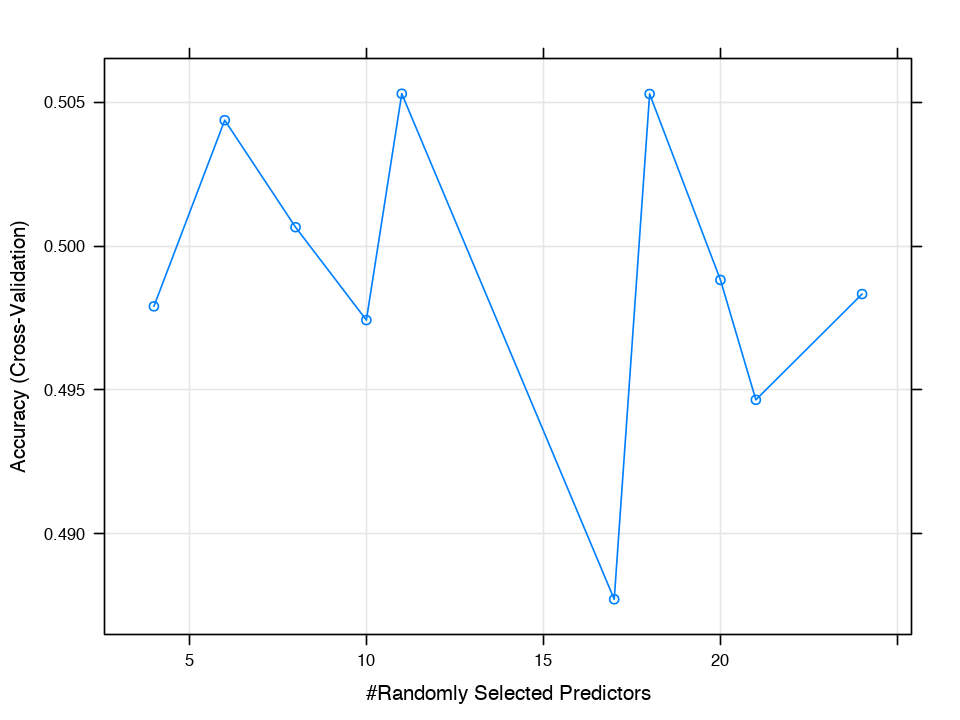

In [222]:
# Random Search
#control <- trainControl(method="repeatedcv", number=10, repeats=3, search="random")
control <- trainControl(method="cv", number=10, search="random")
seed=23
set.seed(seed)
metric <- "Accuracy"
mtry <- sqrt(ncol(Train)-3)
rf_random <- train(target~. - YEAR - COUNTRY, data=Train, method="rf", metric=metric, tuneLength=15, trControl=control)
print(rf_random)
plot(rf_random)

In [223]:
table(Train$target)


Above Below 
 1134  1029 

In [224]:
1134/(1134+1029)

[1] 0.5242718

In [999]:
forest <- randomForest(target ~ . - YEAR - COUNTRY, data=Train, ntree=100, mtry=3)

#varImpPlot(forest)

In [1000]:
#rf <- predict(forest, type = "class")
#confusionMatrix(rf, Train$target, positive = "Above")

rf <- predict(forest, newdata=Test, type = "class")
confusionMatrix(rf, Test$target, positive = "Above")

Confusion Matrix and Statistics

          Reference
Prediction Above Below
     Above   179   180
     Below   127   107
                                          
               Accuracy : 0.4823          
                 95% CI : (0.4414, 0.5234)
    No Information Rate : 0.516           
    P-Value [Acc > NIR] : 0.953925        
                                          
                  Kappa : -0.0425         
 Mcnemar's Test P-Value : 0.002999        
                                          
            Sensitivity : 0.5850          
            Specificity : 0.3728          
         Pos Pred Value : 0.4986          
         Neg Pred Value : 0.4573          
             Prevalence : 0.5160          
         Detection Rate : 0.3019          
   Detection Prevalence : 0.6054          
      Balanced Accuracy : 0.4789          
                                          
       'Positive' Class : Above           
                                          

In [884]:
table(Test$target)


Above Below 
  306   287 

In [885]:
306/(306+287)

[1] 0.5160202

# Cluster Analysis

In [225]:
# Create data set for each cluster
df_cluster1 = subset(df_detrended,cluster_id==1)
df_cluster2 = subset(df_detrended,cluster_id==2)
df_cluster3 = subset(df_detrended,cluster_id==3)


# Random Forest Model on Clusters

In [239]:
cluster_centres

,AVG_TEMP_JAN,AVG_TEMP_FEB,AVG_TEMP_MAR,AVG_TEMP_APR,AVG_TEMP_MAY,AVG_TEMP_JUN,AVG_TEMP_JUL,AVG_TEMP_AUG,AVG_TEMP_SEP,AVG_TEMP_OCT,⋯,AVG_RF_MAR,AVG_RF_APR,AVG_RF_MAY,AVG_RF_JUN,AVG_RF_JUL,AVG_RF_AUG,AVG_RF_SEP,AVG_RF_OCT,AVG_RF_NOV,AVG_RF_DEC
1,-0.9139926,0.5358739,5.024352,10.34044,15.06090,19.14154,21.35687,20.93695,16.77355,11.37797,⋯,46.37633,54.53914,64.55288,73.13713,81.12206,71.22311,61.48687,51.97886,46.65562,45.42754
2,24.0359879,25.1488650,26.427381,27.23361,27.16674,26.63539,26.08088,25.93994,26.02402,25.98844,⋯,79.80640,114.83842,192.15828,217.47123,237.41794,256.44858,233.07965,202.88168,132.21445,97.43469
3,21.9672502,22.6808928,23.473940,23.82931,23.68084,23.09932,22.66812,23.19086,23.86149,23.93736,⋯,110.86165,89.66226,65.13080,43.18670,45.18882,47.97957,51.79083,69.76430,85.06078,100.09433


In [236]:
# Model features
target_variable = 'target'
attribute_variables = c('COUNTRY','YEAR')
weather_features = c('AVG_TEMP_JAN_Z','AVG_TEMP_FEB_Z','AVG_TEMP_MAR_Z','AVG_TEMP_APR_Z','AVG_TEMP_MAY_Z','AVG_TEMP_JUN_Z',
                     'AVG_TEMP_JUL_Z','AVG_TEMP_AUG_Z','AVG_TEMP_SEP_Z','AVG_TEMP_OCT_Z','AVG_TEMP_NOV_Z','AVG_TEMP_DEC_Z',
                     'AVG_RF_JAN_Z','AVG_RF_FEB_Z','AVG_RF_MAR_Z','AVG_RF_APR_Z','AVG_RF_MAY_Z','AVG_RF_JUN_Z',
                     'AVG_RF_JUL_Z','AVG_RF_AUG_Z','AVG_RF_SEP_Z','AVG_RF_OCT_Z','AVG_RF_NOV_Z','AVG_RF_DEC_Z')

#weather_features = c('AVG_TEMP_JAN','AVG_TEMP_FEB','AVG_TEMP_MAR','AVG_TEMP_APR','AVG_TEMP_MAY','AVG_TEMP_JUN',
#                     'AVG_TEMP_JUL','AVG_TEMP_AUG','AVG_TEMP_SEP','AVG_TEMP_OCT','AVG_TEMP_NOV','AVG_TEMP_DEC',
#                     'AVG_RF_JAN','AVG_RF_FEB','AVG_RF_MAR','AVG_RF_APR','AVG_RF_MAY','AVG_RF_JUN',
#                     'AVG_RF_JUL','AVG_RF_AUG','AVG_RF_SEP','AVG_RF_OCT','AVG_RF_NOV','AVG_RF_DEC')


#
# Create dataframe with variables required for model
#
df_model_data = df_cluster3[,c(target_variable, attribute_variables, weather_features)]




In [237]:
split = sample.split(df_model_data$target,SplitRatio=0.7)
Train = subset(df_model_data,split==T)
Test = subset(df_model_data,split==F)

Train = df_model_data

Random Forest 

735 samples
 26 predictor
  2 classes: 'Above', 'Below' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 662, 662, 662, 661, 661, 662, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa      
   4    0.5089411  -0.03178260
   6    0.4953721  -0.05328357
   8    0.5115883  -0.01646781
  10    0.5075713  -0.02530603
  11    0.4898556  -0.06097221
  17    0.5074602  -0.02117809
  18    0.5074602  -0.02407707
  20    0.5142910  -0.01042496
  21    0.4898741  -0.06041043
  24    0.5047945  -0.02940753

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 20.


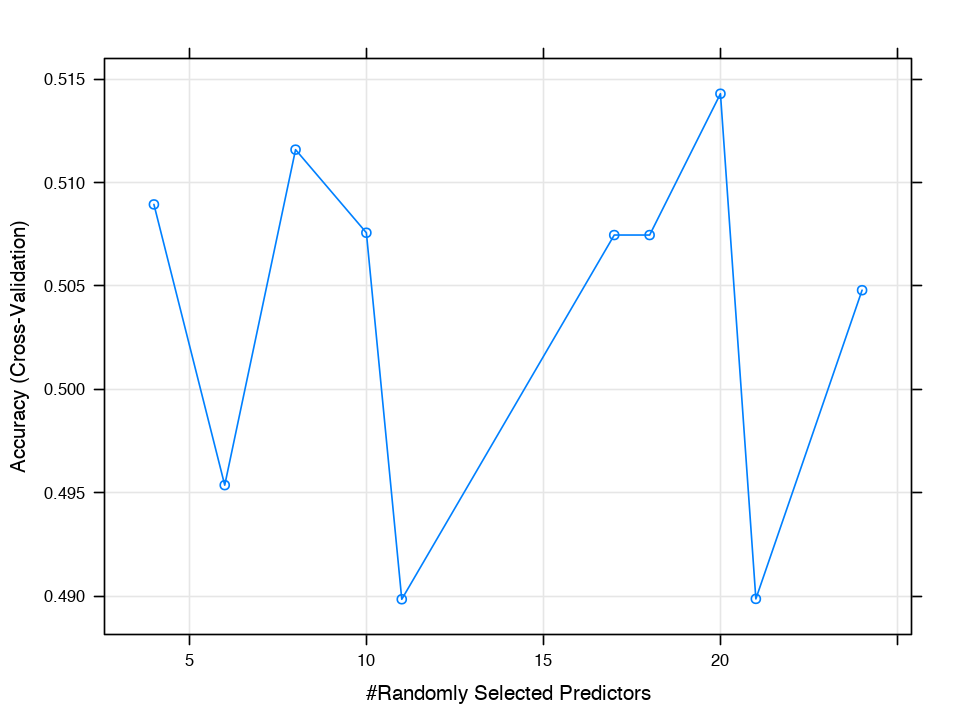

In [238]:
# Random Search
#control <- trainControl(method="repeatedcv", number=10, repeats=3, search="random")
control <- trainControl(method="cv", number=10, search="random")
seed=23
set.seed(seed)
metric <- "Accuracy"
mtry <- sqrt(ncol(Train)-3)
rf_random <- train(target~. - YEAR - COUNTRY, data=Train, method="rf", metric=metric, tuneLength=15, trControl=control)
print(rf_random)
plot(rf_random)

In [240]:
table(Train$target)


Above Below 
  404   331 

In [241]:
404/(404+331)

[1] 0.5496599

In [1115]:
forest <- randomForest(target ~ . - YEAR - COUNTRY, data=Train, ntree=500,mtry=24)

rf <- predict(forest, newdata=Test, type = "class")
confusionMatrix(rf, Test$target, positive = "Above")

Confusion Matrix and Statistics

          Reference
Prediction Above Below
     Above    51    45
     Below    38    36
                                          
               Accuracy : 0.5118          
                 95% CI : (0.4341, 0.5891)
    No Information Rate : 0.5235          
    P-Value [Acc > NIR] : 0.6498          
                                          
                  Kappa : 0.0175          
 Mcnemar's Test P-Value : 0.5102          
                                          
            Sensitivity : 0.5730          
            Specificity : 0.4444          
         Pos Pred Value : 0.5312          
         Neg Pred Value : 0.4865          
             Prevalence : 0.5235          
         Detection Rate : 0.3000          
   Detection Prevalence : 0.5647          
      Balanced Accuracy : 0.5087          
                                          
       'Positive' Class : Above           
                                          

In [1122]:
table(Test$target)


Above Below 
  118   115 

In [1123]:
118/(118+115)

[1] 0.5064378

In [1125]:
table(Train$target)
275/(275+269)


Above Below 
  275   269 

[1] 0.5055147

In [1107]:
accuracy = c()
for (iter in 1:100)
{
 forest <- randomForest(target ~ . - YEAR - COUNTRY, data=Train, ntree=500, mtry=5) 
 rf <- predict(forest, newdata=Test, type = "class")
 cm = confusionMatrix(rf, Test$target, positive = "Above")
 accuracy[iter] = cm$overall[['Accuracy']]
}


In [1108]:
summary(accuracy)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4941  0.5176  0.5353  0.5321  0.5412  0.5882 

# Annual Total Paddy Rice Production File

Here I detail how I created the file wrs_annual_rice_production.csv. 

On the World Rice Statistics online query engine

http://ricestat.irri.org:8080/wrsv3/entrypoint.htm

I generated a csv file (WRS_paddy_production.csv) for the variable "PRODUCTION - PADDY" for all countries from 1991-2016.

I then read in this file and generated the csv file wrs_annual_rice_production.csv as follows:


In [141]:
# Set the working directory
setwd("/Users/billyhanan/Documents/NCI  Diploma in Data Analytics/Advanced Data Mining/Project")

# Read in WRS file holding annual rice production values
df_rice_production = read.csv("./Data/WRS Data/WRS_paddy_production.csv",header=T)

# Keep FAO source values only
df_rice_production = subset(df_rice_production,Source=="FAO")

# Keep only columns needed
df_rice_production = df_rice_production[,c('Country','Year','Value')]

# Rename the Value column to PRODUCTION
names(df_rice_production)[3] <- "PRODUCTION"

# Remove 2016 data
df_rice_production = df_rice_production[df_rice_production$Year!=2016,]

# Rename some country names that are mis-matched with those in master data frame
levels(df_rice_production$Country)[levels(df_rice_production$Country)=="UNITED STATES OF AMERICA"] = "UNITED STATES"
levels(df_rice_production$Country)[levels(df_rice_production$Country)=="CONGO DR"] = "CONGO"

# Avoid values being converted to scientic notation when writing them out to a file
options(scipen = 999)

# Write data to csv file
write.csv(df_rice_production, file = "./Data/wrs_annual_rice_production.csv",row.names=FALSE,quote=F)